# **Import Libraries**

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing PCA and TSNE
from sklearn.decomposition import PCA

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier


from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer

import tensorflow as tf
import kerastuner as kt
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
import random


# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Library to tune different models
from sklearn.model_selection import GridSearchCV


# Libraries to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer
)
from scipy.stats import zscore

import random
import time

In [ ]:
initial_time = time.time()

# **Read Data**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment 1/forestdata.csv')

# **Understand Data**

In [ ]:
# function that prints head, tail, duplicated index and missing values in the data
# function takes data frame name as input

def understand_data(df):

    # Colors used in the visualisations
    colors = ['lavender','indigo']

    # View head of the data
    print('First 5 Observations')
    print('-'*50)
    display(df.head())

    # View tail of the data
    print('\nLast 5 Observations')
    print('-'*50)
    display(df.tail())

    # Number of rows and columns
    rows, columns = df.shape

    # Print number of rows and columns
    print("\nNo of rows: ", rows)
    print("No of columns: ", columns)

    # Information regarding the data
    print('\nInformation of Data Frame')
    print('-'*50)
    print(df.info())


    # Describe the data
    print('\nDescription of Data Frame Numerical Fields:')
    print('-'*50)
    print(df.describe().T)

    # Unique values for the features
    print('\nUnique Values')
    print('-'*25)
    print(df.nunique())

    # Checking for missing values in the data
    print('\nNull Values')
    print('-'*25)
    print(df.isnull().sum())


    # check for blank values in the data
    print('\nBlank Values')
    print('-'*25)
    for i in df:
        print(i, ':', df[df[i] == ''].shape[0])


    # if there are blank values that are not read as NULL
    # Replace blank values with null value in dataframe
    df = df.replace({'': None})


    # data frame for missing values
    miss = pd.DataFrame(data={'Missing Values': df.isna().sum()})

    # variable to check if there are any missing values
    if_miss = 0

    # iterate through all rows in the missing values data frame
    for row in miss['Missing Values']:
        # if any value in the data frame is greater than 0
        if row > 0:
            # make if_miss variable as 1
            if_miss = 1

    print('\n')
    # if if_miss variable is greater than 0 (i.e. there are missing values in data)
    if if_miss == 1:

        # plot missing values bar chart

        # Percentage of null value
        # Number of observations with null values divided by total number of observations
        # df.isna().sum() will add all True values i.e. the number of null values
        # df.isna().count() will count all values (both True and False) and give the total observations
        (pd.DataFrame(data={'% of Missing Values':round(df.isna().
                                                    sum()/df.isna().
                                                    count()*100,2)}).
        sort_values(by = '% of Missing Values', ascending = False).
        plot(kind = 'bar', color = colors[1], figsize = (15,5), legend = False)
        )

        # title, x label and y label
        plt.title('Missing Values in %age for Features', fontsize = 14)
        plt.xlabel('Features', fontsize = 12)
        plt.ylabel('Percentage', fontsize = 12)


        # show the plot
        plt.show()

    else:
        print('\nNo Missing Values')

First 5 Observations
--------------------------------------------------


collector.id  c.score   l.score      rain  tree.age  surface.litter  \
0             5    13.11  3.421591  0.477187     34.66        6.718047   
1             7    11.99  2.874611  0.212425     19.39        6.242029   
2             6    12.91  2.827774  0.118141     15.75        6.397929   
3             5    12.06  2.772961  0.097565     13.25        6.278146   
4             2    15.06  3.271684  0.438121     47.14        6.932448   

   wind.intensity  humidity  tree.density  month time.of.day  fire  
0        3.335635      52.0       0.69860      8   afternoon     1  
1        3.127024      59.0       0.62020      4     morning     0  
2        3.052446      60.0       0.58235     10       night     0  
3        3.114239      60.0       0.57025      9   afternoon     1  
4        3.214831      51.0       0.71150      7     morning     1


Last 5 Observations
--------------------------------------------------


collector.id  c.score   l.score      rain  tree.age  surface.litter  \
451             5   11.340  2.865292  0.094384     16.41        6.250168   
452            10   13.700  2.847752  0.157058     20.64        6.531606   
453             6    9.720  2.718282  0.000000     21.69        5.716370   
454             9   13.170  2.962686  0.261034     14.49        6.607596   
455             8    9.847  2.783123  0.120080     15.24        5.930918   

     wind.intensity  humidity  tree.density  month time.of.day  fire  
451        3.271296      58.0       0.58278      3   afternoon     0  
452        3.087569      60.0       0.59077      9       night     0  
453        2.926373      62.0       0.50000      2   afternoon     0  
454        3.196904      52.0       0.66070      6       night     1  
455        3.165976      58.0       0.56528     12       night     0


No of rows:  456
No of columns:  12

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   collector.id    456 non-null    int64  
 1   c.score         456 non-null    float64
 2   l.score         455 non-null    float64
 3   rain            455 non-null    float64
 4   tree.age        455 non-null    float64
 5   surface.litter  456 non-null    float64
 6   wind.intensity  455 non-null    float64
 7   humidity        453 non-null    float64
 8   tree.density    456 non-null    float64
 9   month           456 non-null    int64  
 10  time.of.day     456 non-null    object 
 11  fire            456 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 42.9+ KB
None

Description of Data Frame Numerical Fields:
-------------------------------------

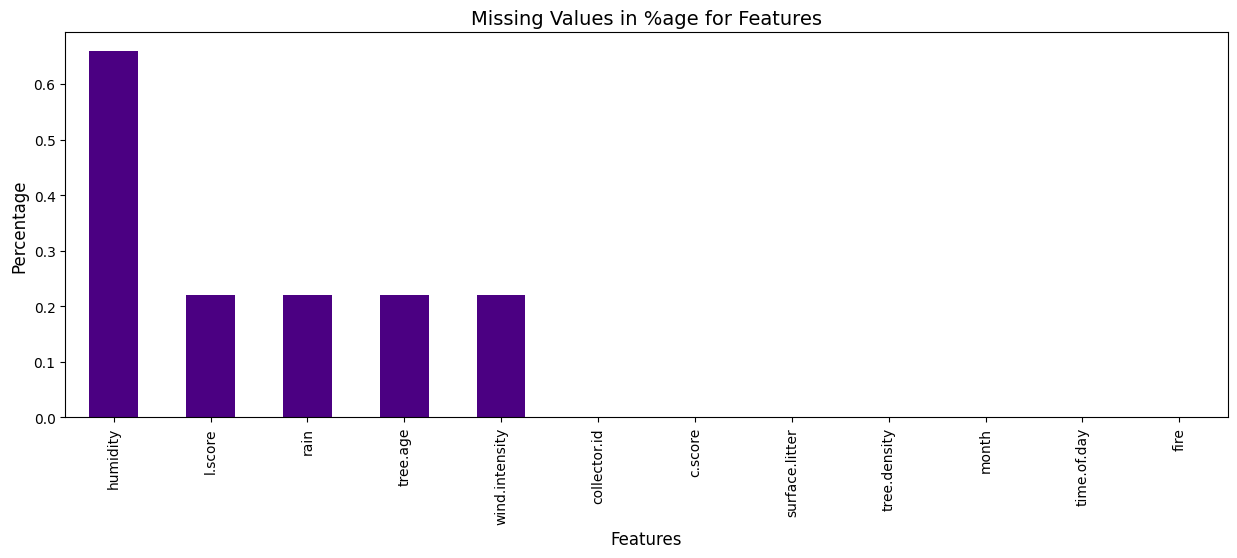

In [ ]:
understand_data(df)

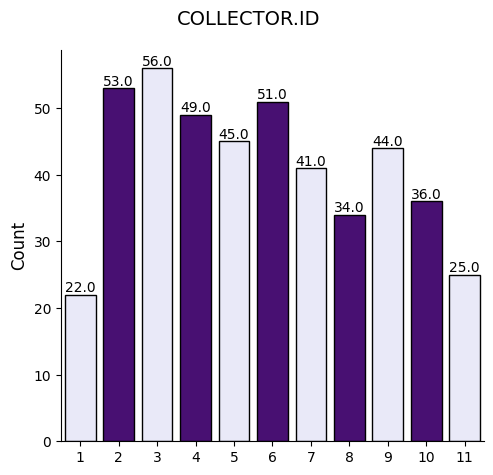

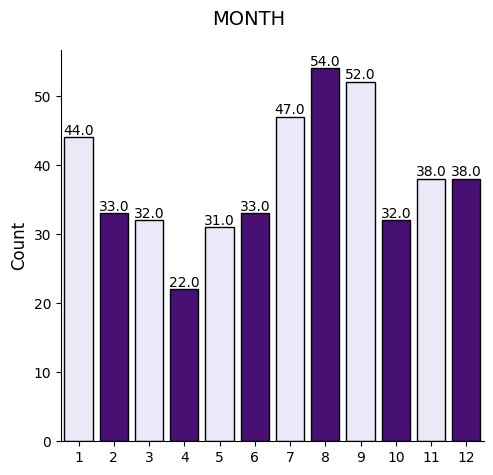

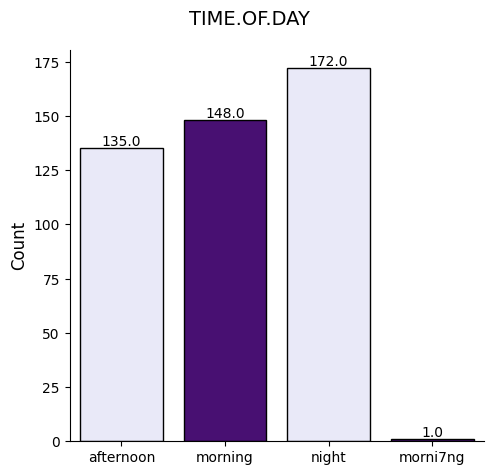

In [ ]:
colors = ['lavender','indigo']
cmap = sns.color_palette('Purples', as_cmap=True)
pal = sns.set_palette('Purples')
cat_cols = ['collector.id', 'month', 'time.of.day']
# Plot categorical variables as count plot using seaborn library

# Iterate through all the categorical variables
for col in cat_cols:
        # Create a count plot for the categorical variable
        a = sns.catplot(
            kind = 'count',
            x = col,
            data = df,
            palette = colors,
            edgecolor = 'black'
        )
        # Title for the categorical plot
        a.fig.suptitle('{}'.format(col).upper(), fontsize = 14)
        # Adjust the top margin for the plot area for better asethetics
        a.fig.subplots_adjust(top=0.9)
        # X-axis label: None
        plt.xlabel('')
        # Y axis label: Count
        plt.ylabel('Count', fontsize = 12)
        # Show the values at the top of each bar
        ax = a.facet_axis(0, 0)
        for c in ax.containers:
            labels = [f'{(v.get_height() )}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')

# **Clean Data**

## **Drop Null Values**

In [ ]:
# drop null values
df = df.dropna()

## **Drop Features Not to be Utilised in Model Building**

In [ ]:
# drop collector id (staff member id) as not rquired in modelling
df = df.drop(columns = ['collector.id'])

## **Convert Categorical Variables from Int or Float to Object**

In [ ]:
col_change = ['month', 'fire']

In [ ]:
for col in col_change:
    df[col] = df[col].astype('object')

## **Replace Mispelled Data**

In [ ]:
cat_cols = ['month', 'time.of.day']
num_cols = ['c.score', 'l.score', 'rain', 'tree.age', 'surface.litter', 'wind.intensity', 'humidity', 'tree.density']
target = 'fire'

In [ ]:
df['time.of.day'] = df['time.of.day'].replace('morni7ng','morning')

In [ ]:
# Percentages of observations for each categorical feature
for col in cat_cols:
    print("Unique values in", col, "are :")
    print(df[col].value_counts(normalize = True))
    print('-'*50)

Unique values in month are :
8     0.115813
9     0.113586
7     0.104677
1     0.095768
12    0.084633
11    0.082405
6     0.073497
2     0.071269
3     0.071269
10    0.069042
5     0.069042
4     0.048998
Name: month, dtype: float64
--------------------------------------------------
Unique values in time.of.day are :
night        0.376392
morning      0.329621
afternoon    0.293987
Name: time.of.day, dtype: float64
--------------------------------------------------


In [ ]:
print("Unique values in", target, "are :")
print(df[target].value_counts(normalize = True))
print('-'*50)

Unique values in fire are :
0    0.63029
1    0.36971
Name: fire, dtype: float64
--------------------------------------------------


In [ ]:
understand_data(df)

First 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
0    13.11  3.421591  0.477187     34.66        6.718047        3.335635   
1    11.99  2.874611  0.212425     19.39        6.242029        3.127024   
2    12.91  2.827774  0.118141     15.75        6.397929        3.052446   
3    12.06  2.772961  0.097565     13.25        6.278146        3.114239   
4    15.06  3.271684  0.438121     47.14        6.932448        3.214831   

   humidity  tree.density month time.of.day fire  
0      52.0       0.69860     8   afternoon    1  
1      59.0       0.62020     4     morning    0  
2      60.0       0.58235    10       night    0  
3      60.0       0.57025     9   afternoon    1  
4      51.0       0.71150     7     morning    1


Last 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
451   11.340  2.865292  0.094384     16.41        6.250168        3.271296   
452   13.700  2.847752  0.157058     20.64        6.531606        3.087569   
453    9.720  2.718282  0.000000     21.69        5.716370        2.926373   
454   13.170  2.962686  0.261034     14.49        6.607596        3.196904   
455    9.847  2.783123  0.120080     15.24        5.930918        3.165976   

     humidity  tree.density month time.of.day fire  
451      58.0       0.58278     3   afternoon    0  
452      60.0       0.59077     9       night    0  
453      62.0       0.50000     2   afternoon    0  
454      52.0       0.66070     6       night    1  
455      58.0       0.56528    12       night    0


No of rows:  449
No of columns:  11

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 455
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c.score         449 non-null    float64
 1   l.score         449 non-null    float64
 2   rain            449 non-null    float64
 3   tree.age        449 non-null    float64
 4   surface.litter  449 non-null    float64
 5   wind.intensity  449 non-null    float64
 6   humidity        449 non-null    float64
 7   tree.density    449 non-null    float64
 8   month           449 non-null    object 
 9   time.of.day     449 non-null    object 
 10  fire            449 non-null    object 
dtypes: float64(8), object(3)
memory usage: 42.1+ KB
None

Description of Data Frame Numerical Fields:
--------------------------------------------------
                count       mean         

# **EDA: Visualise Data**

In [ ]:
# Colors used in the visualisations
colors = ['lavender','indigo']
cmap = sns.color_palette('Purples', as_cmap=True)
pal = sns.set_palette('Purples')

## Numeric Columns

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        color=colors[0],
        meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":colors[1]},
        flierprops=dict(marker='o', markerfacecolor=colors[1], markersize=8,
                  linestyle='none', markeredgecolor=colors[0])
    )  # boxplot will be created and a square will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color=colors[1]
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color=colors[1]
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="#d55e00", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="#029e73", linestyle="-"
    )  # Add median to the histogram

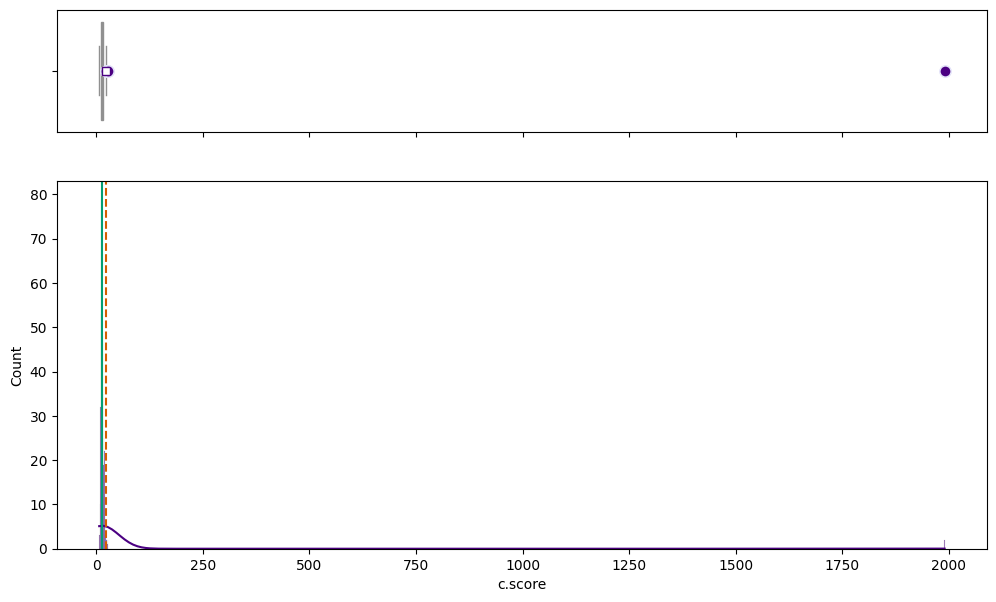

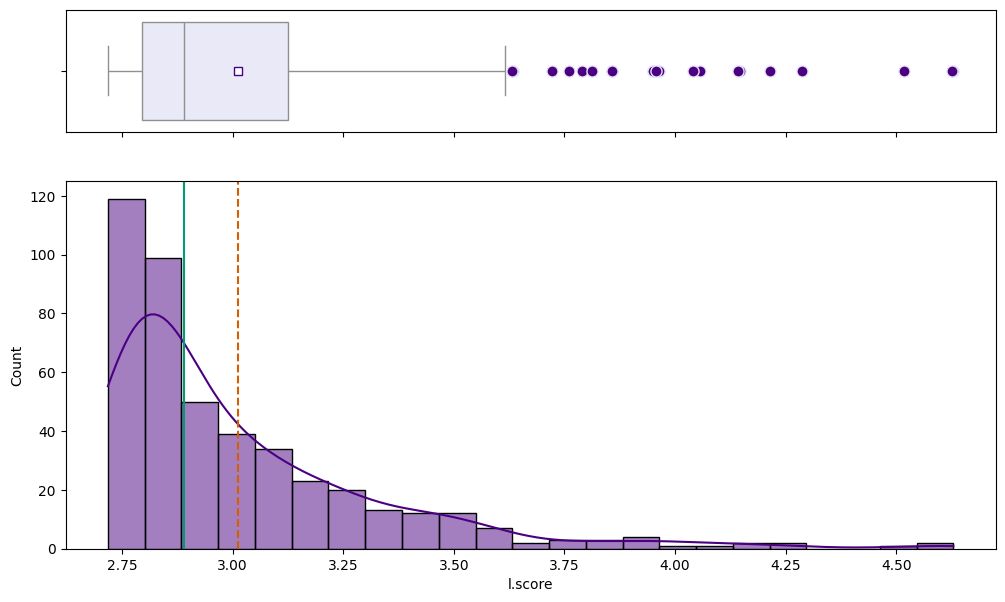

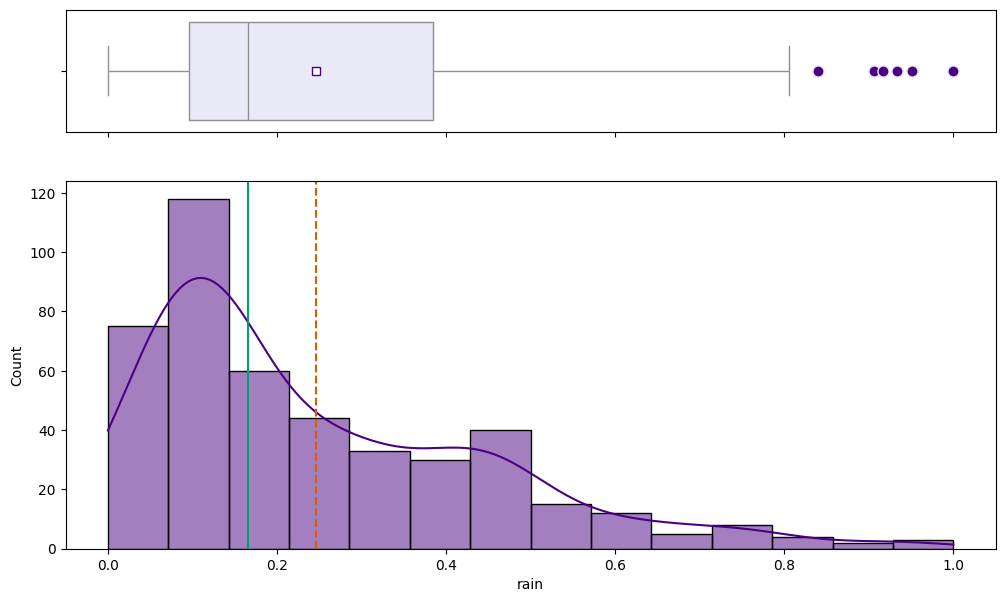

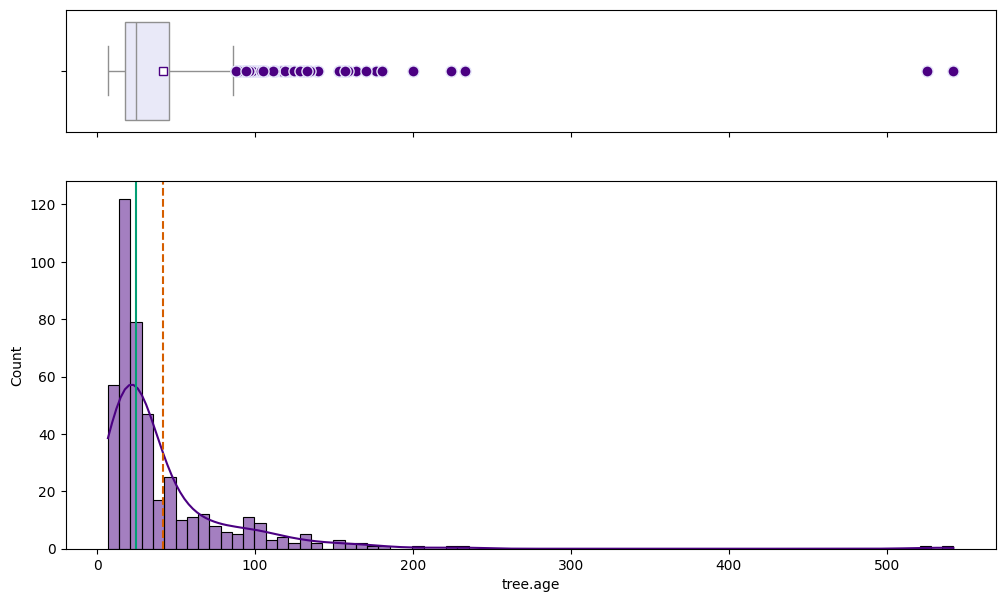

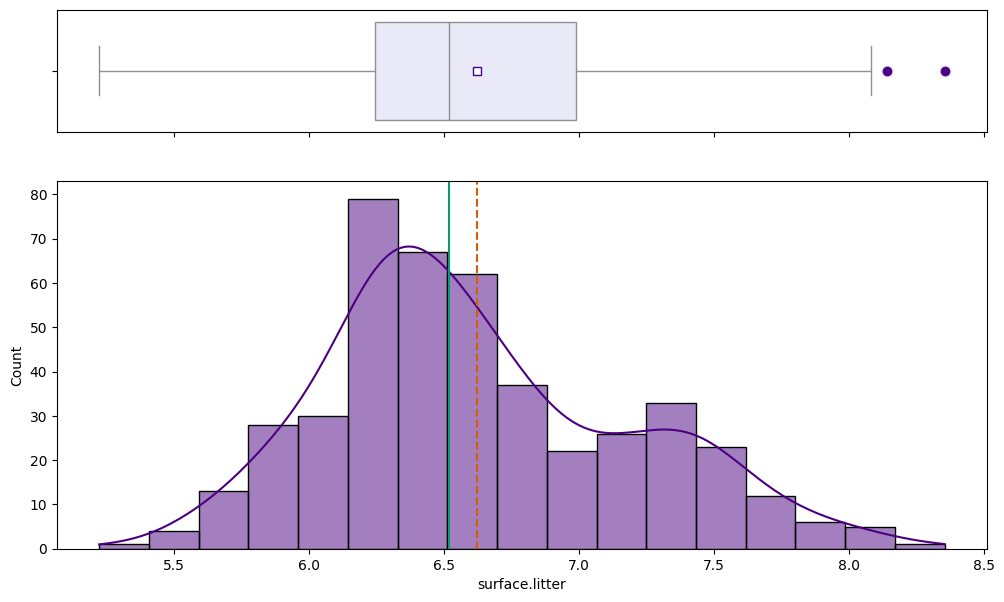

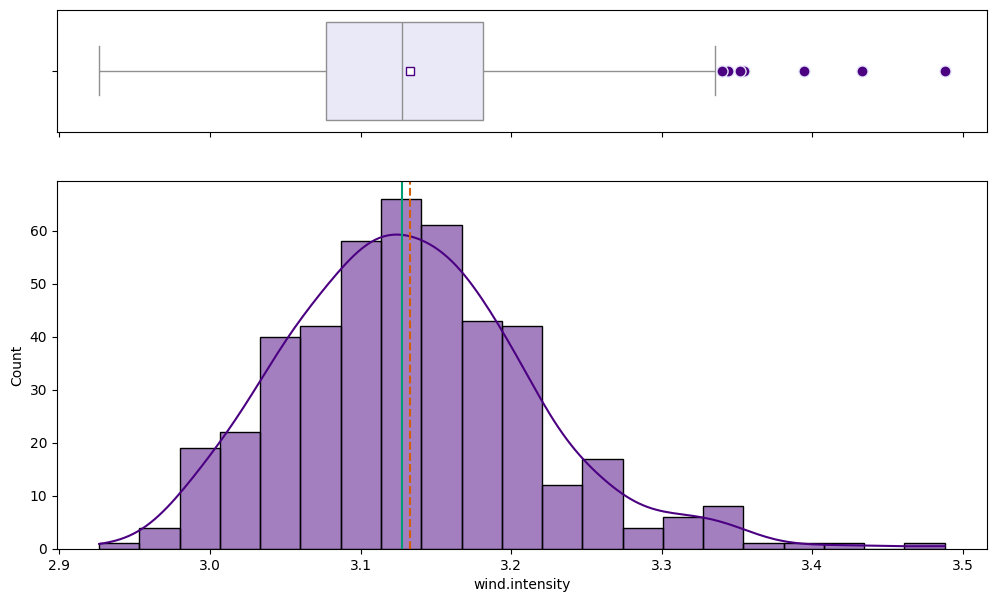

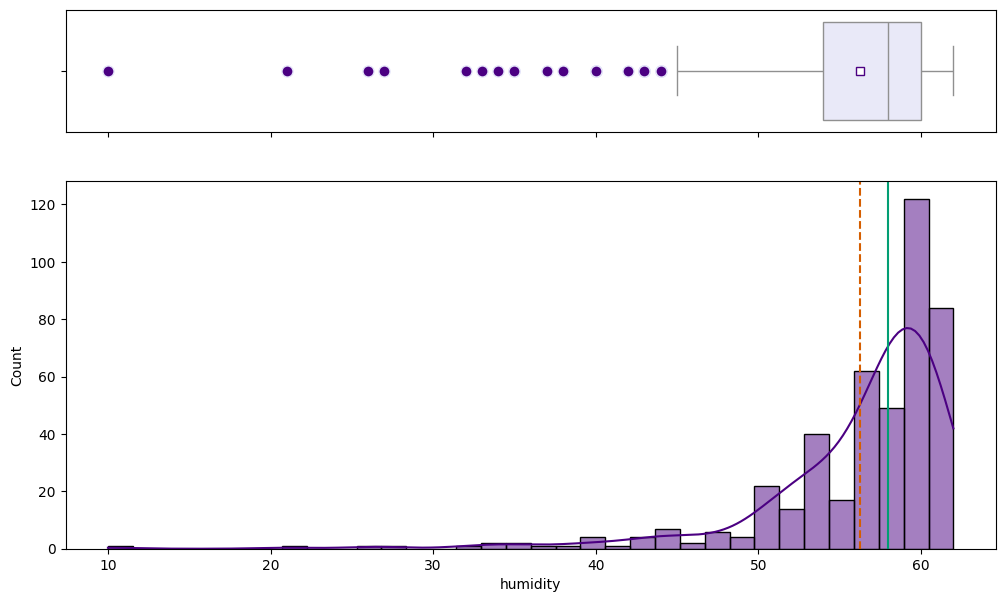

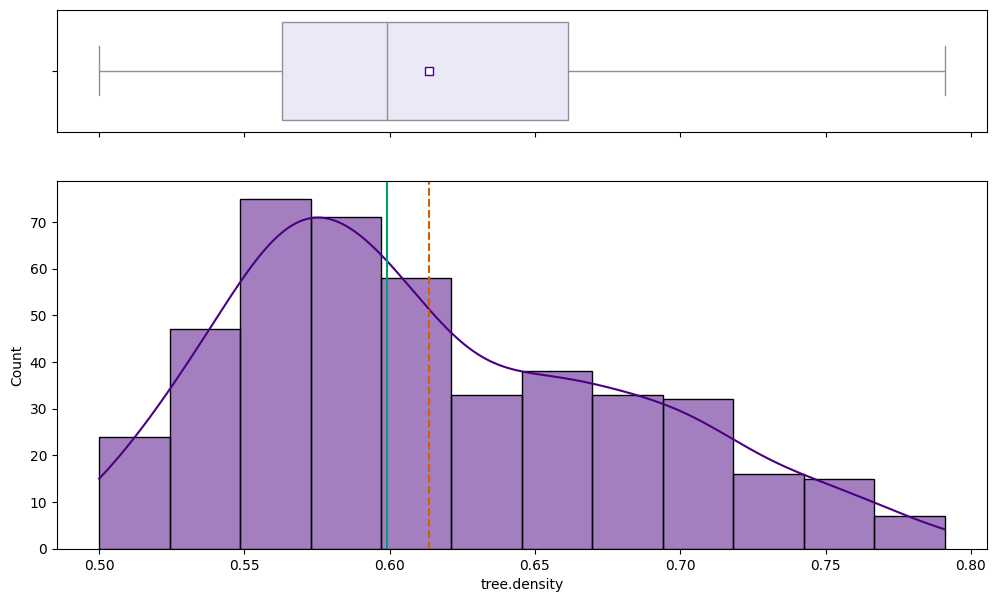

In [ ]:
# create histogram and boxplots for all the numerical variables
for col in num_cols:
    hist_boxplot(df, col)

In [ ]:
df = df[df['c.score'] < 1000]

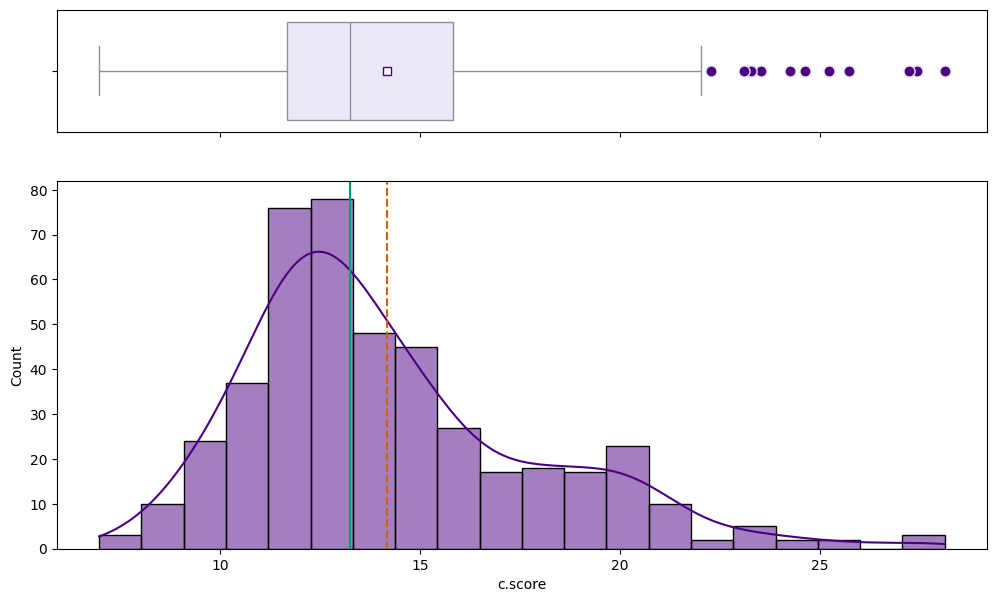

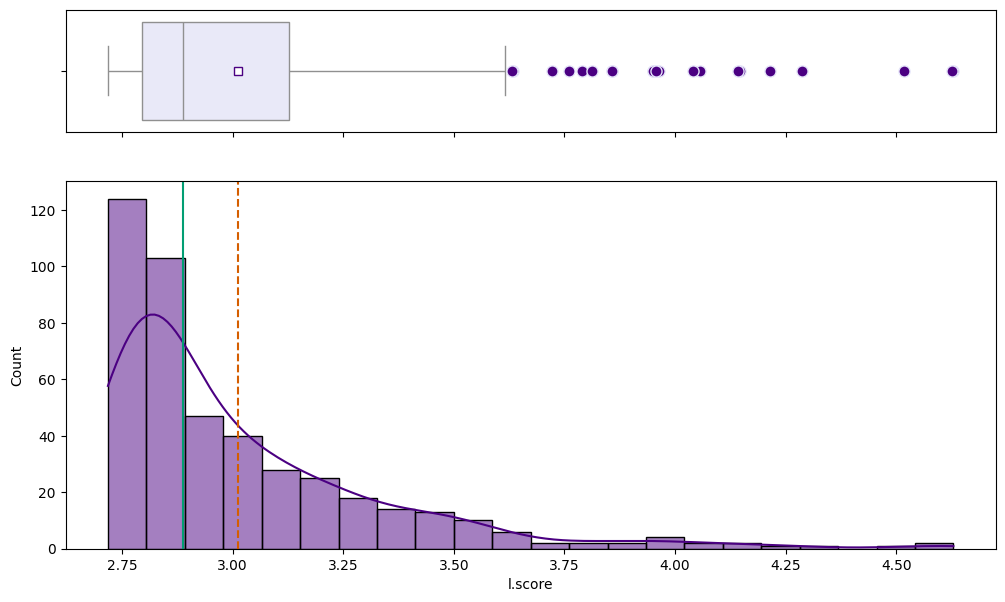

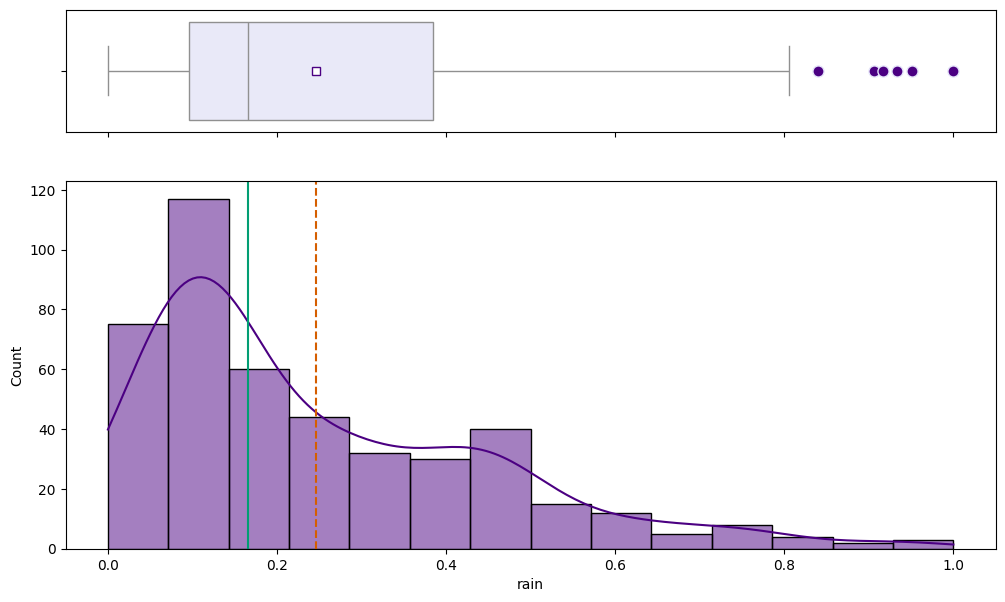

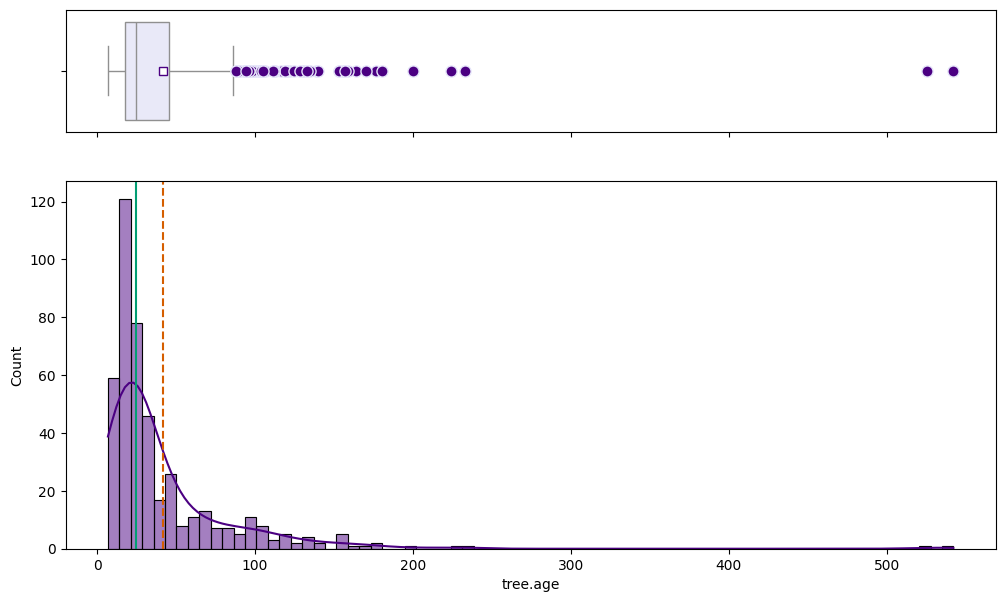

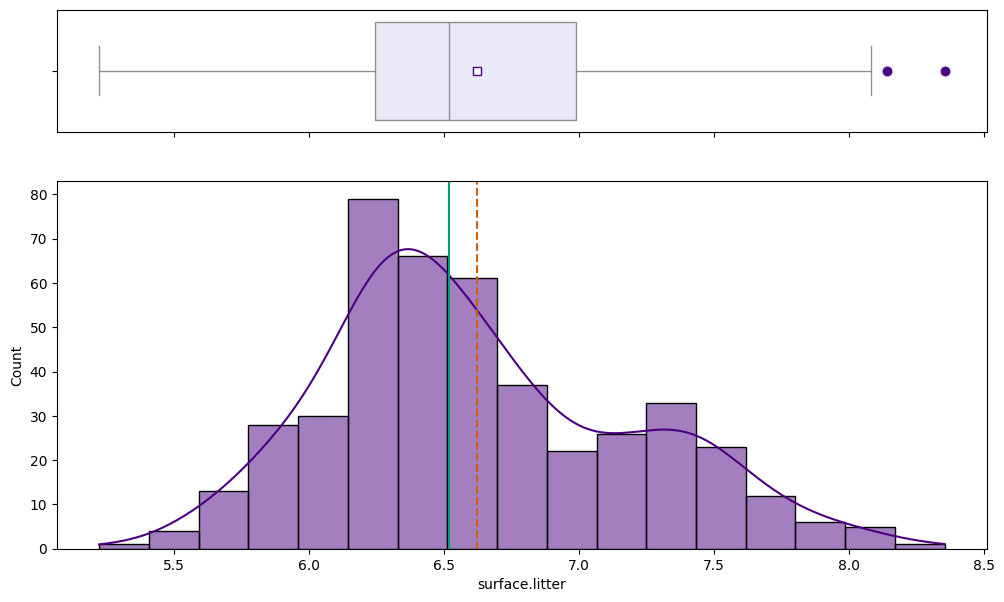

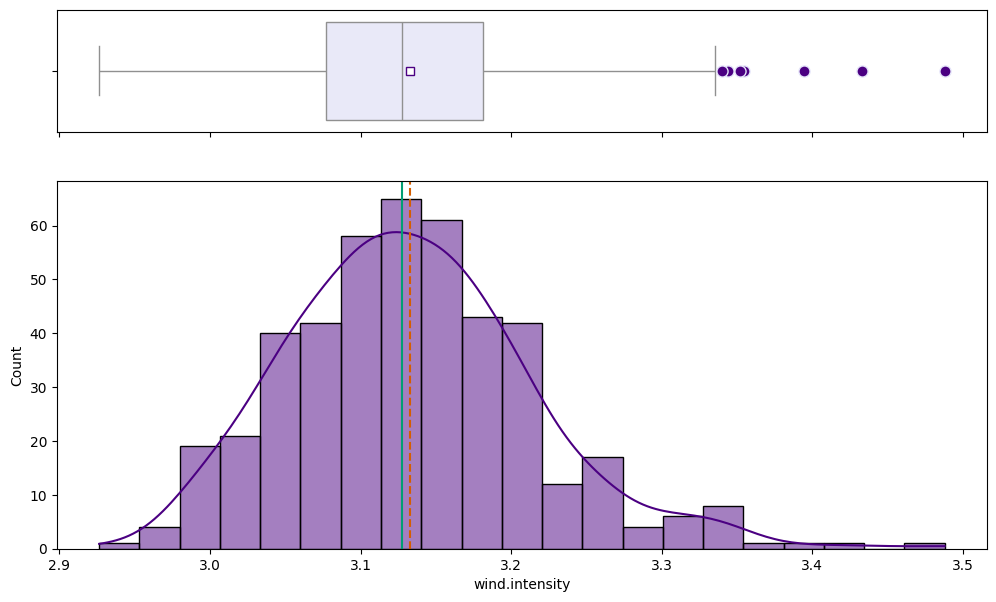

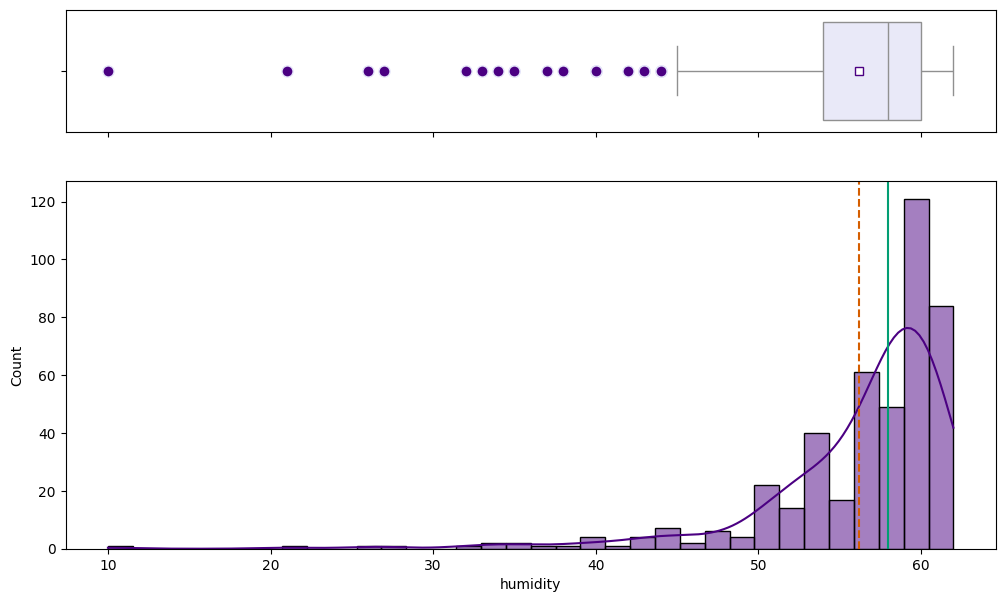

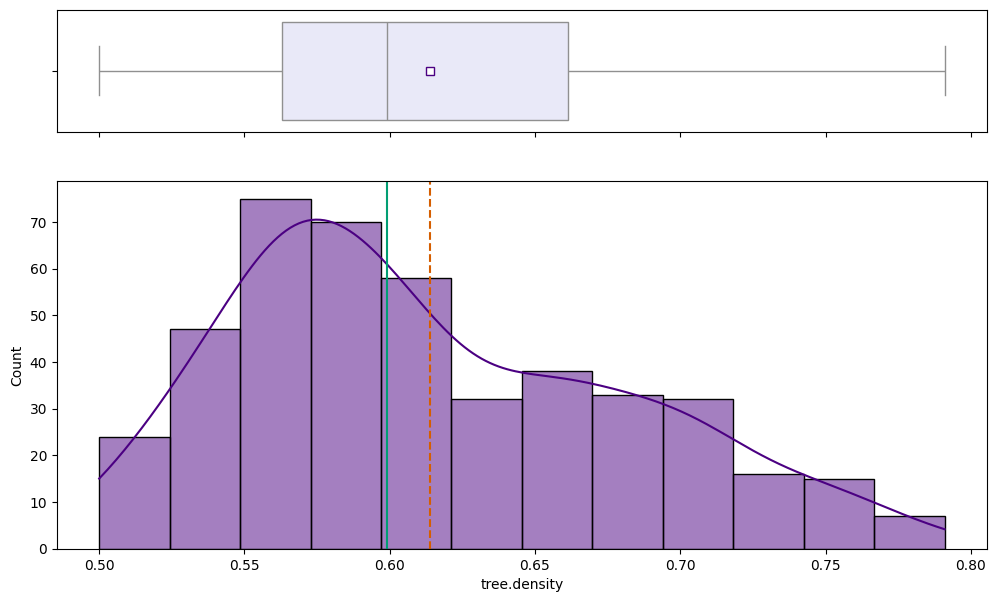

In [ ]:
# create histogram and boxplots for all the numerical variables
for col in num_cols:
    hist_boxplot(df, col)

In [ ]:
understand_data(df)

First 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
0    13.11  3.421591  0.477187     34.66        6.718047        3.335635   
1    11.99  2.874611  0.212425     19.39        6.242029        3.127024   
2    12.91  2.827774  0.118141     15.75        6.397929        3.052446   
3    12.06  2.772961  0.097565     13.25        6.278146        3.114239   
4    15.06  3.271684  0.438121     47.14        6.932448        3.214831   

   humidity  tree.density month time.of.day fire  
0      52.0       0.69860     8   afternoon    1  
1      59.0       0.62020     4     morning    0  
2      60.0       0.58235    10       night    0  
3      60.0       0.57025     9   afternoon    1  
4      51.0       0.71150     7     morning    1


Last 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
451   11.340  2.865292  0.094384     16.41        6.250168        3.271296   
452   13.700  2.847752  0.157058     20.64        6.531606        3.087569   
453    9.720  2.718282  0.000000     21.69        5.716370        2.926373   
454   13.170  2.962686  0.261034     14.49        6.607596        3.196904   
455    9.847  2.783123  0.120080     15.24        5.930918        3.165976   

     humidity  tree.density month time.of.day fire  
451      58.0       0.58278     3   afternoon    0  
452      60.0       0.59077     9       night    0  
453      62.0       0.50000     2   afternoon    0  
454      52.0       0.66070     6       night    1  
455      58.0       0.56528    12       night    0


No of rows:  447
No of columns:  11

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c.score         447 non-null    float64
 1   l.score         447 non-null    float64
 2   rain            447 non-null    float64
 3   tree.age        447 non-null    float64
 4   surface.litter  447 non-null    float64
 5   wind.intensity  447 non-null    float64
 6   humidity        447 non-null    float64
 7   tree.density    447 non-null    float64
 8   month           447 non-null    object 
 9   time.of.day     447 non-null    object 
 10  fire            447 non-null    object 
dtypes: float64(8), object(3)
memory usage: 41.9+ KB
None

Description of Data Frame Numerical Fields:
--------------------------------------------------
                count       mean        s

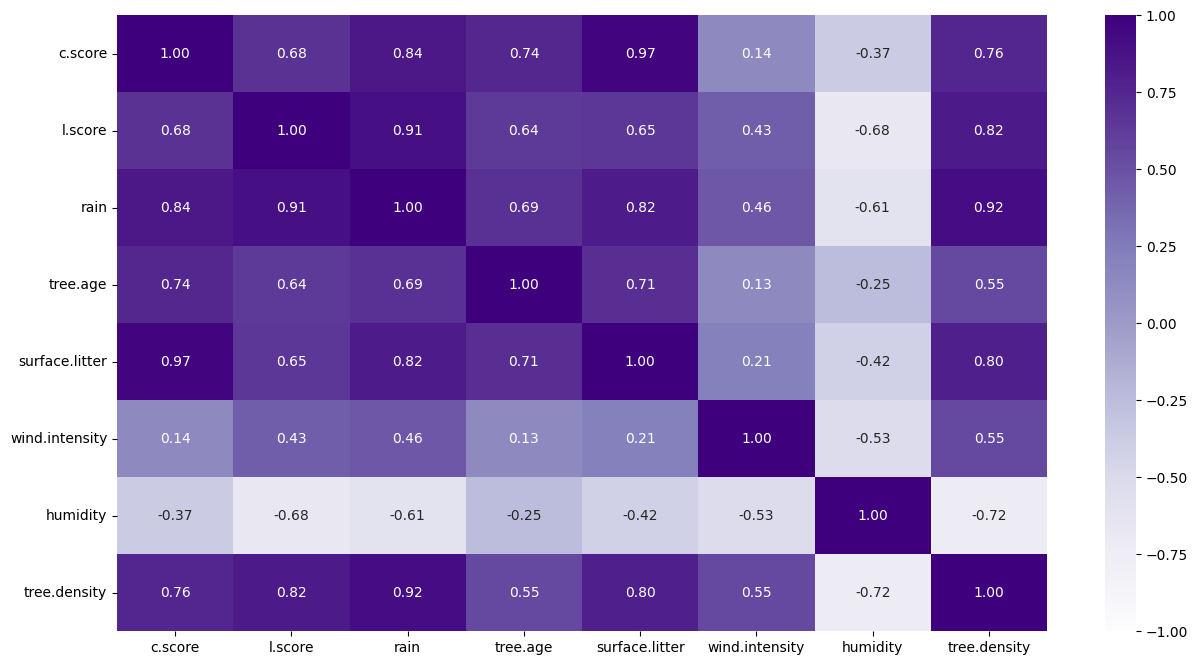

In [ ]:
# Create a figure with a specified size for the heatmap
plt.figure(figsize=(15, 8))

# Generate a correlation heatmap using seaborn
sns.heatmap(
    df[num_cols].corr(), # Calculate and use the correlation matrix of numerical columns
    annot=True, # Display correlation values within each cell
    vmin=-1, vmax=1, # Set the color range from -1 to 1 for correlations
    fmt=".2f", # Format correlation values to two decimal places
    cmap='Purples' # Choose a purple colormap for visualization
)
# display the plot
plt.show()


## Categorical Columns

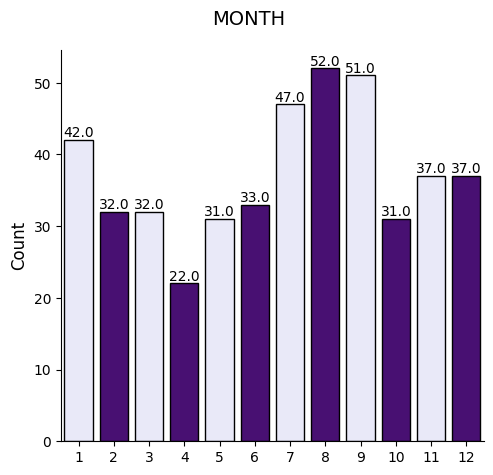

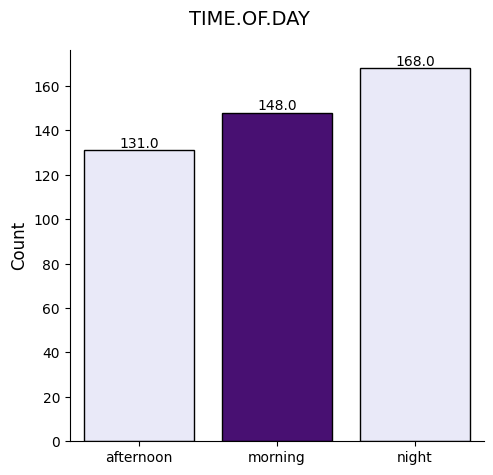

In [ ]:
# Plot categorical variables as count plot using seaborn library

# Iterate through all the categorical variables
for col in cat_cols:
        # Create a count plot for the categorical variable
        a = sns.catplot(
            kind = 'count',
            x = col,
            data = df,
            palette = colors,
            edgecolor = 'black'
        )
        # Title for the categorical plot
        a.fig.suptitle('{}'.format(col).upper(), fontsize = 14)
        # Adjust the top margin for the plot area for better asethetics
        a.fig.subplots_adjust(top=0.9)
        # X-axis label: None
        plt.xlabel('')
        # Y axis label: Count
        plt.ylabel('Count', fontsize = 12)
        # Show the values at the top of each bar
        ax = a.facet_axis(0, 0)
        for c in ax.containers:
            labels = [f'{(v.get_height() )}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')


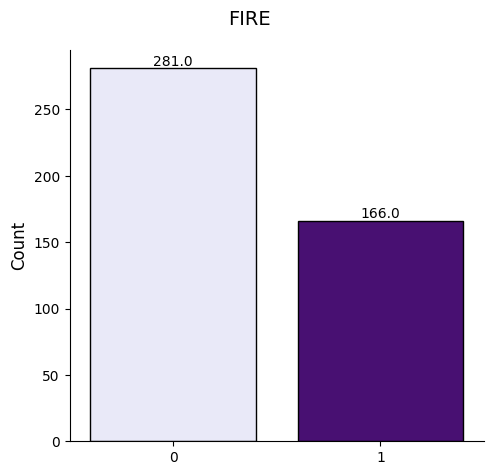

In [ ]:
# Create a count plot for the categorical variable
a = sns.catplot(
    kind = 'count',
    x = target,
    data = df,
    palette = colors,
    edgecolor = 'black'
        )
# Title for the categorical plot
a.fig.suptitle('{}'.format(target).upper(), fontsize = 14)
# Adjust the top margin for the plot area for better asethetics
a.fig.subplots_adjust(top=0.9)
# X-axis label: None
plt.xlabel('')
# Y axis label: Count
plt.ylabel('Count', fontsize = 12)
# Show the values at the top of each bar
ax = a.facet_axis(0, 0)
for c in ax.containers:
  labels = [f'{(v.get_height() )}' for v in c]
  ax.bar_label(c, labels=labels, label_type='edge')

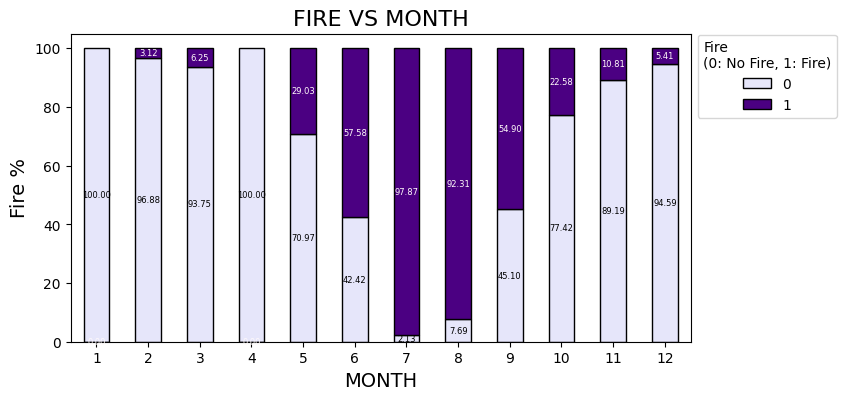

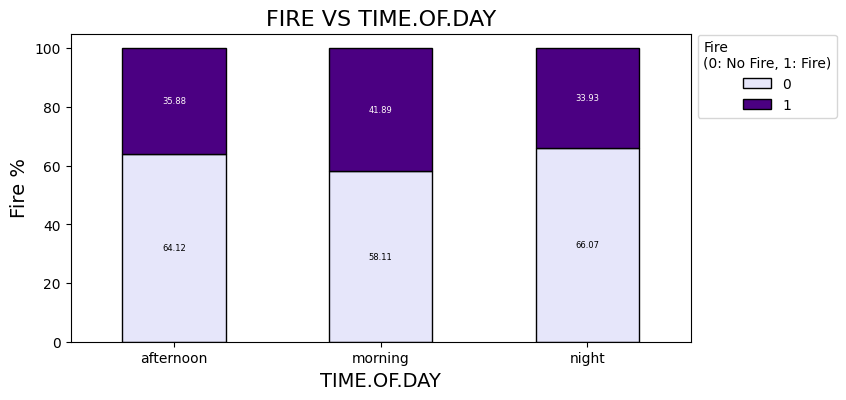

In [ ]:
"""
Iterate through categorical variables:
The loop processes each categorical variable in the cat_cols list.

Check target variable: It excludes the target variable 'DEATH_EVENT' from analysis.

Create crosstabulation: It constructs a contingency table (crosstab),
showing the relationship between the current categorical variable and the target variable. Normalization by index calculates percentages within each category.

Generate stacked bar chart: It visualizes the crosstab as a stacked bar chart,
with bars representing the proportion of DEATH_EVENT events within each category.

Apply formatting: It sets labels, titles, legend, bar colors, and font sizes for clarity and visual appeal.
Rotate x-axis labels: It rotates x-axis labels to prevent overlapping for readability.
"""


# Iterate through all the categorical variables
for col in cat_cols:
        # Create a crosstabulation of the current categorical variable with the target variable
        crosstab = (pd.crosstab(df[col],df[target],normalize='index')*100)

        # Create a stacked bar chart with proper formatting
        a = crosstab.plot(
            kind='bar',
            figsize=(8,4),
            stacked=True,
            color = colors,
            edgecolor = 'black'
        )
        plt.ylabel('Fire %', fontsize = 14)
        plt.xlabel('{}'.format(col).upper(), fontsize = 14)
        a.legend(title='Fire\n(0: No Fire, 1: Fire)', bbox_to_anchor=(1, 1.02),loc='upper left')
        a.bar_label(a.containers[0], label_type='center', fmt = '{:.2f}', color = 'black', fontsize = 6)
        a.bar_label(a.containers[1], label_type='center', fmt = '{:.2f}', color = 'snow', fontsize = 6)
        plt.title('Fire vs {}'.format(col).upper(), fontsize = 16)
        plt.xticks(rotation=0, fontsize=10)



## Outliers

In [ ]:
def outliers(df):
    Q1 = df.quantile(0.25)  # To find the 25th percentile and 75th percentile.
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    # Finding lower and upper bounds for all values. All values outside these bounds are outliers
    lower = (Q1 - 1.5 * IQR)
    upper = Q3 + 1.5 * IQR

    result = pd.DataFrame((
        ((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)
    ).sum() / len(df)) * 100)

    return result

In [ ]:
outliers(df[num_cols])

0
c.score          2.908277
l.score          4.697987
rain             1.342282
tree.age        12.080537
surface.litter   0.447427
wind.intensity   1.565996
humidity         5.145414
tree.density     0.000000

## **Observations**:

*   The Data is unbalanced:
    *   166 cases of fire
    *   283 cases reported for no fire
*   Most of the fires happened between May and October with maximum number of fires occuring in July ang August
*   Tree density and Surface Litter looks like normally distributed
*   Humidity, Tree Age, Rain, Carbohydrate Makeup and Relative Mass of Wood are skewed


*   Tree density is highly positively correlated with:
      *   Rain
      *   Relative mass of wood to leaves
      *   Surface Litter

*   Humidity is highly negatively correlated with:
      *   Rain
      *   Relative mass of wood to leaves
      *   Tree Density

*   Surface Litter is highly positively correlated with:
      *   Rain
      *   Tree Density
      *   Tree Age
      *   Relative mass of wood to leaves

*   Tree Age is highly positively correlated with:
      *   Surface Litter
      *   Rain
      *   Relative mass of wood to leaves

*   Rain is highly positively correlated with:
      *   Surface Litter
      *   Tree Density
      *   Relative mass of wood to leaves

*   Tree Age has more than 12% outliers
*   Humidity has more than 5% outliers
*   Tree Density has no outliers


# **Data Pre-Processing**

In [ ]:
# Label encoding for categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Separating the target variable and other variables
X = df.drop(columns = target)
Y = df[target].astype('int')

In [ ]:
X_scaled = X.copy()
X_scaled[num_cols] = sc.fit_transform(X[num_cols])

In [ ]:
understand_data(X_scaled)

First 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
0 -0.297166  1.286326  1.146985 -0.145588        0.169095        2.491058   
1 -0.606663 -0.429821 -0.169090 -0.455546       -0.675113       -0.075545   
2 -0.352433 -0.576773 -0.637758 -0.529433       -0.398627       -0.993100   
3 -0.587319 -0.748748 -0.740040 -0.580179       -0.611060       -0.232841   
4  0.241690  0.815994  0.952798  0.107738        0.549331        1.004766   

   humidity  tree.density  month  time.of.day  
0 -0.686342      1.262070      7            0  
1  0.452345      0.096305      3            1  
2  0.615015     -0.466503      9            2  
3  0.615015     -0.646424      8            0  
4 -0.849012      1.453886      6            1


Last 5 Observations
--------------------------------------------------


c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
451 -0.786281 -0.459061 -0.755852 -0.516036       -0.660678        1.699477   
452 -0.134128 -0.514091 -0.444312 -0.430173       -0.161553       -0.560970   
453 -1.233946 -0.920304 -1.225014 -0.408860       -1.607359       -2.544212   
454 -0.280586 -0.153486  0.072532 -0.555009       -0.026787        0.784208   
455 -1.198851 -0.716866 -0.628123 -0.539785       -1.226862        0.403692   

     humidity  tree.density  month  time.of.day  
451  0.289676     -0.460109      2            0  
452  0.615015     -0.341303      8            2  
453  0.940354     -1.691003      1            0  
454 -0.686342      0.698518      5            2  
455  0.289676     -0.720325     11            2


No of rows:  447
No of columns:  10

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c.score         447 non-null    float64
 1   l.score         447 non-null    float64
 2   rain            447 non-null    float64
 3   tree.age        447 non-null    float64
 4   surface.litter  447 non-null    float64
 5   wind.intensity  447 non-null    float64
 6   humidity        447 non-null    float64
 7   tree.density    447 non-null    float64
 8   month           447 non-null    int64  
 9   time.of.day     447 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 38.4 KB
None

Description of Data Frame Numerical Fields:
--------------------------------------------------
                count          mean       std       min       25%       50%  \
c.score  

## **Dimensionality Reduction**

In [ ]:
#Defining the number of principal components to generate
n = X_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca.fit_transform(X_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

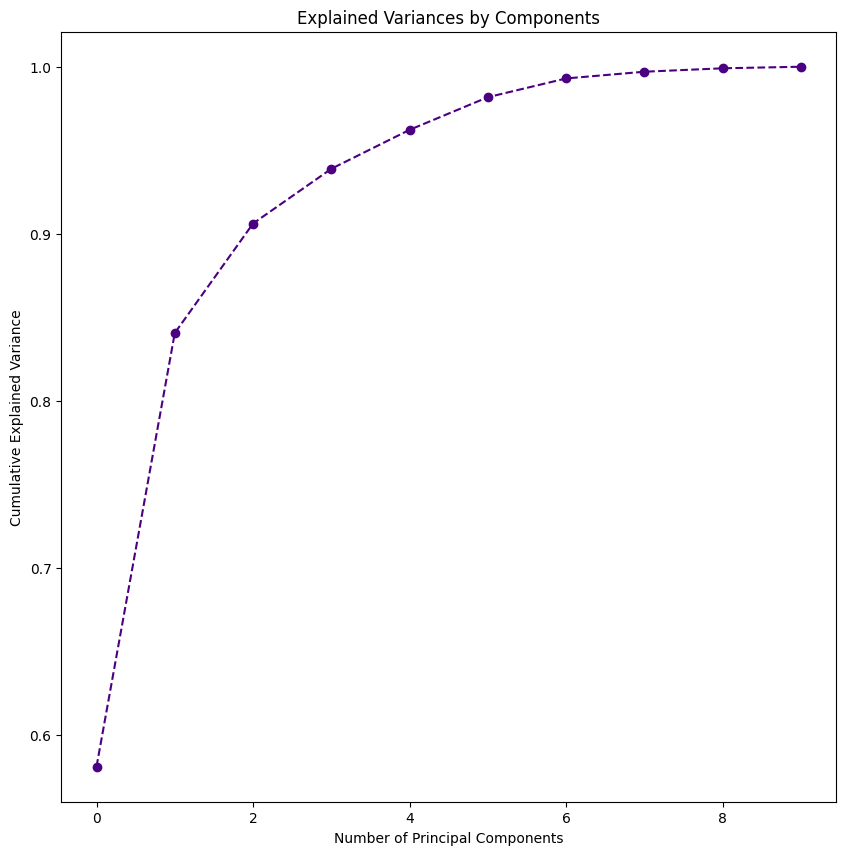

In [ ]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color = colors[1])
plt.title("Explained Variances by Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [ ]:
# find the least number of components that can explain more than 90% variance
sum = 0
var = 0.9
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum > var):
    print(f"Number of PCs that explain at least {var*100}% variance: ", ix+1)
    break

n_pc = ix+1

Number of PCs that explain at least 90.0% variance:  3


In [ ]:
#Making a new dataframe with first 5 principal components and original features as indices
p_cols = []
for n in range(1, n_pc+1):
  p_cols.append('PC'+str(n))
print(p_cols)

pc = pd.DataFrame(np.round(pca.components_.T[:, 0:n_pc],2), index=X_scaled.columns, columns=p_cols)

['PC1', 'PC2', 'PC3']


In [ ]:
def color_high(val):
    if val <= -0.35:
        return 'background: pink'
    elif val >= 0.35:
        return 'background: skyblue'

pc.style.applymap(color_high)

* '**Time of the Day**' feature can be dropped.

In [ ]:
# drop features that are not contributing enough towards the principal components
X_scaled = X_scaled.drop(columns = ['time.of.day'])

## **Split Data**

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 1)

In [ ]:
# Checking the shape of train and test data

print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (357, 9)
Shape of the test set:  (90, 9)
Percentage of classes in the training set:
0    0.602241
1    0.397759
Name: fire, dtype: float64
Percentage of classes in the test set:
0    0.733333
1    0.266667
Name: fire, dtype: float64


# **Classification Models**

## **Performance Metrics for Different Models**

In [ ]:
# Creating metric function
# Function to print the classification report and get confusion matrix in a proper format
# function will take 2 arguments: actual data, predicted data for the target variable

def metrics_score(actual, predicted):
    # print the classification report: precision, recall, f-1 score
    # Precision for a label is defined as the number of true positives divided by the number of predicted positives.
    # Recall for a label is defined as the number of true positives divided by the total number of actual positives.
    # F1 Score is the harmonic mean of precision and recall.
    print(classification_report(actual, predicted))

    # confusion matrix
    cm = confusion_matrix(actual, predicted)

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    accuracy = round((tp+tn)/(tn+fp+fn+tp),2)
    fpr = round(fp/(fp+tn), 2)
    fnr = round(fn/(fn+tp), 2)
    specificity = round(tn/(tn+fp), 2)
    sensitivity = round(tp/(tp+fn), 2)
    precision = round(tp/(tp+fp), 2)
    recall = round(tp/(tp+fn), 2)
    error_rate = round(1 - accuracy, 2)
    f1 = round((2 * precision * recall) / (precision + recall), 2)


    print('True Positives = ', tp)
    print('True Negatives = ', tn)
    print('Accuracy = ', accuracy)
    print('False Positive Rate = ', fpr)
    print('False Negative Rate = ', fnr)
    print('Sensitivity (True Positive Rate)= ', sensitivity)
    print('Specificity (True Negative Rate) = ', specificity)
    print('Precision = ', precision)
    print('Recall = ', recall)
    print('F1 Score = ', f1)
    print('Error Rate = ', error_rate)


    # figure size
    plt.figure(figsize=(10,5))

    # create heatmap to show confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt='.2f',
        xticklabels=['No Fire', 'Fire'],
        yticklabels=['No Fire', 'Fire'],
        cmap='Purples'
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return precision, recall, f1, sensitivity, specificity

In [ ]:
precision_list = []
recall_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
model_name_list = []
train_time_list = []

## **Logistic Regression**

In [ ]:
t0 = time.time()

# Fitting logistic regression model
lg = LogisticRegression()

lg.fit(X_train,y_train)
t1 = round(time.time() - t0, 2)
train_time_list.append(t1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       215
           1       0.91      0.83      0.87       142

    accuracy                           0.90       357
   macro avg       0.90      0.89      0.89       357
weighted avg       0.90      0.90      0.90       357

True Positives =  118
True Negatives =  203
Accuracy =  0.9
False Positive Rate =  0.06
False Negative Rate =  0.17
Sensitivity (True Positive Rate)=  0.83
Specificity (True Negative Rate) =  0.94
Precision =  0.91
Recall =  0.83
F1 Score =  0.87
Error Rate =  0.1


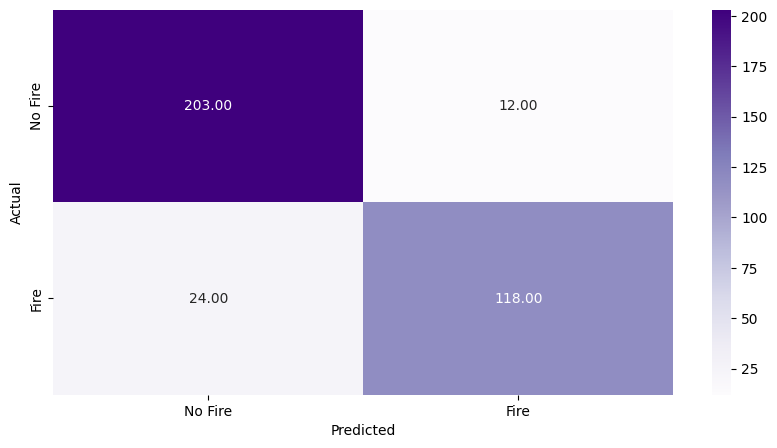

(0.91, 0.83, 0.87, 0.83, 0.94)

In [ ]:
# Checking the performance on the training data
y_pred_train_lg = lg.predict(X_train)
metrics_score(y_train, y_pred_train_lg)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.79      0.92      0.85        24

    accuracy                           0.91        90
   macro avg       0.88      0.91      0.89        90
weighted avg       0.92      0.91      0.91        90

True Positives =  22
True Negatives =  60
Accuracy =  0.91
False Positive Rate =  0.09
False Negative Rate =  0.08
Sensitivity (True Positive Rate)=  0.92
Specificity (True Negative Rate) =  0.91
Precision =  0.79
Recall =  0.92
F1 Score =  0.85
Error Rate =  0.09


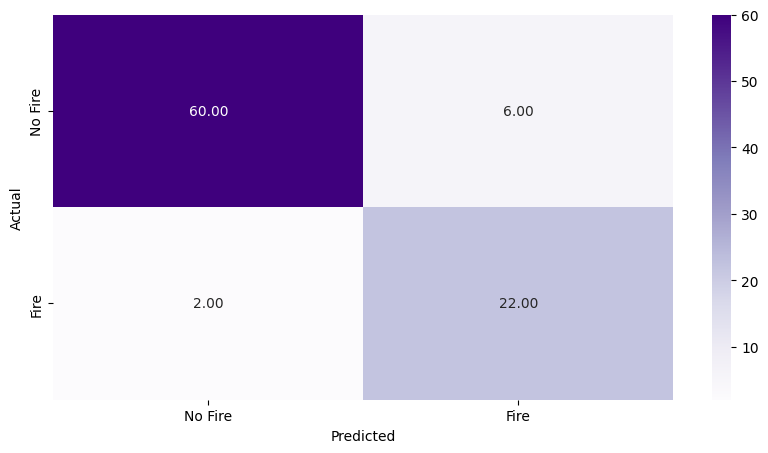

In [ ]:
# Make predictions on the train data
y_pred_test_lg = lg.predict(X_test)

#metrics_score(y_test, y_pred_test_xg)

p_lg, r_lg, f_lg, se_lg, sp_lg = metrics_score(y_test, y_pred_test_lg)
precision_list.append(p_lg)
recall_list.append(r_lg)
f1_list.append(f_lg)
sensitivity_list.append(se_lg)
specificity_list.append(sp_lg)
model_name_list.append('Logistic Regression')


## **Decision Trees**

In [ ]:
t0 = time.time()

# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 3)

d_tree.fit(X_train, y_train)
t1 = time.time() - t0
train_time_list.append(t1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       142

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

True Positives =  142
True Negatives =  215
Accuracy =  1.0
False Positive Rate =  0.0
False Negative Rate =  0.0
Sensitivity (True Positive Rate)=  1.0
Specificity (True Negative Rate) =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
Error Rate =  0.0


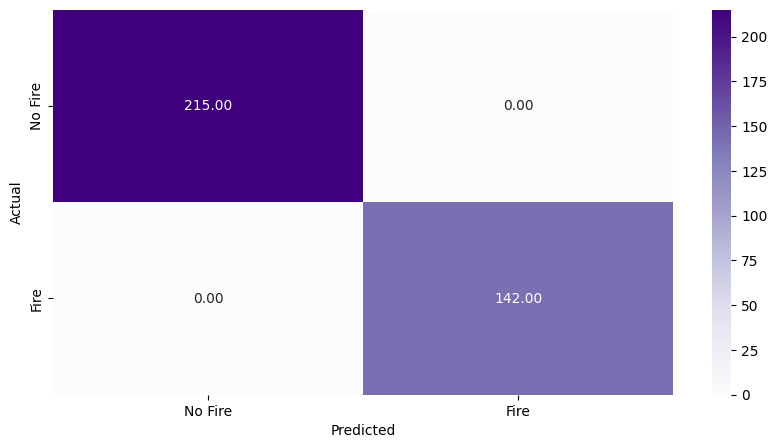

(1.0, 1.0, 1.0, 1.0, 1.0)

In [ ]:
# Checking performance on the training data
y_pred_train_dtree = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train_dtree)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        66
           1       0.70      0.88      0.78        24

    accuracy                           0.87        90
   macro avg       0.82      0.87      0.84        90
weighted avg       0.88      0.87      0.87        90

True Positives =  21
True Negatives =  57
Accuracy =  0.87
False Positive Rate =  0.14
False Negative Rate =  0.12
Sensitivity (True Positive Rate)=  0.88
Specificity (True Negative Rate) =  0.86
Precision =  0.7
Recall =  0.88
F1 Score =  0.78
Error Rate =  0.13


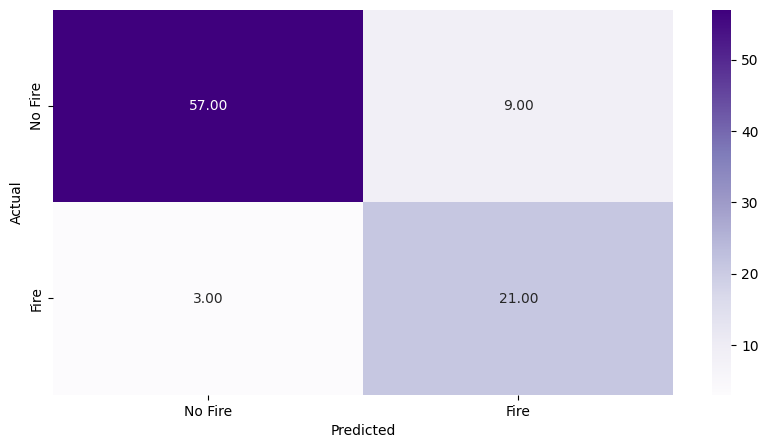

In [ ]:
# Checking performance on the testing data
y_pred_test_dtree = d_tree.predict(X_test)
#metrics_score(y_test, y_pred_test_dtree)
p_dtree, r_dtree, f_dtree, se_dtree, sp_dtree = metrics_score(y_test, y_pred_test_dtree)
precision_list.append(p_dtree)
recall_list.append(r_dtree)
f1_list.append(f_dtree)
sensitivity_list.append(se_dtree)
specificity_list.append(sp_dtree)
model_name_list.append('Decision Tree')

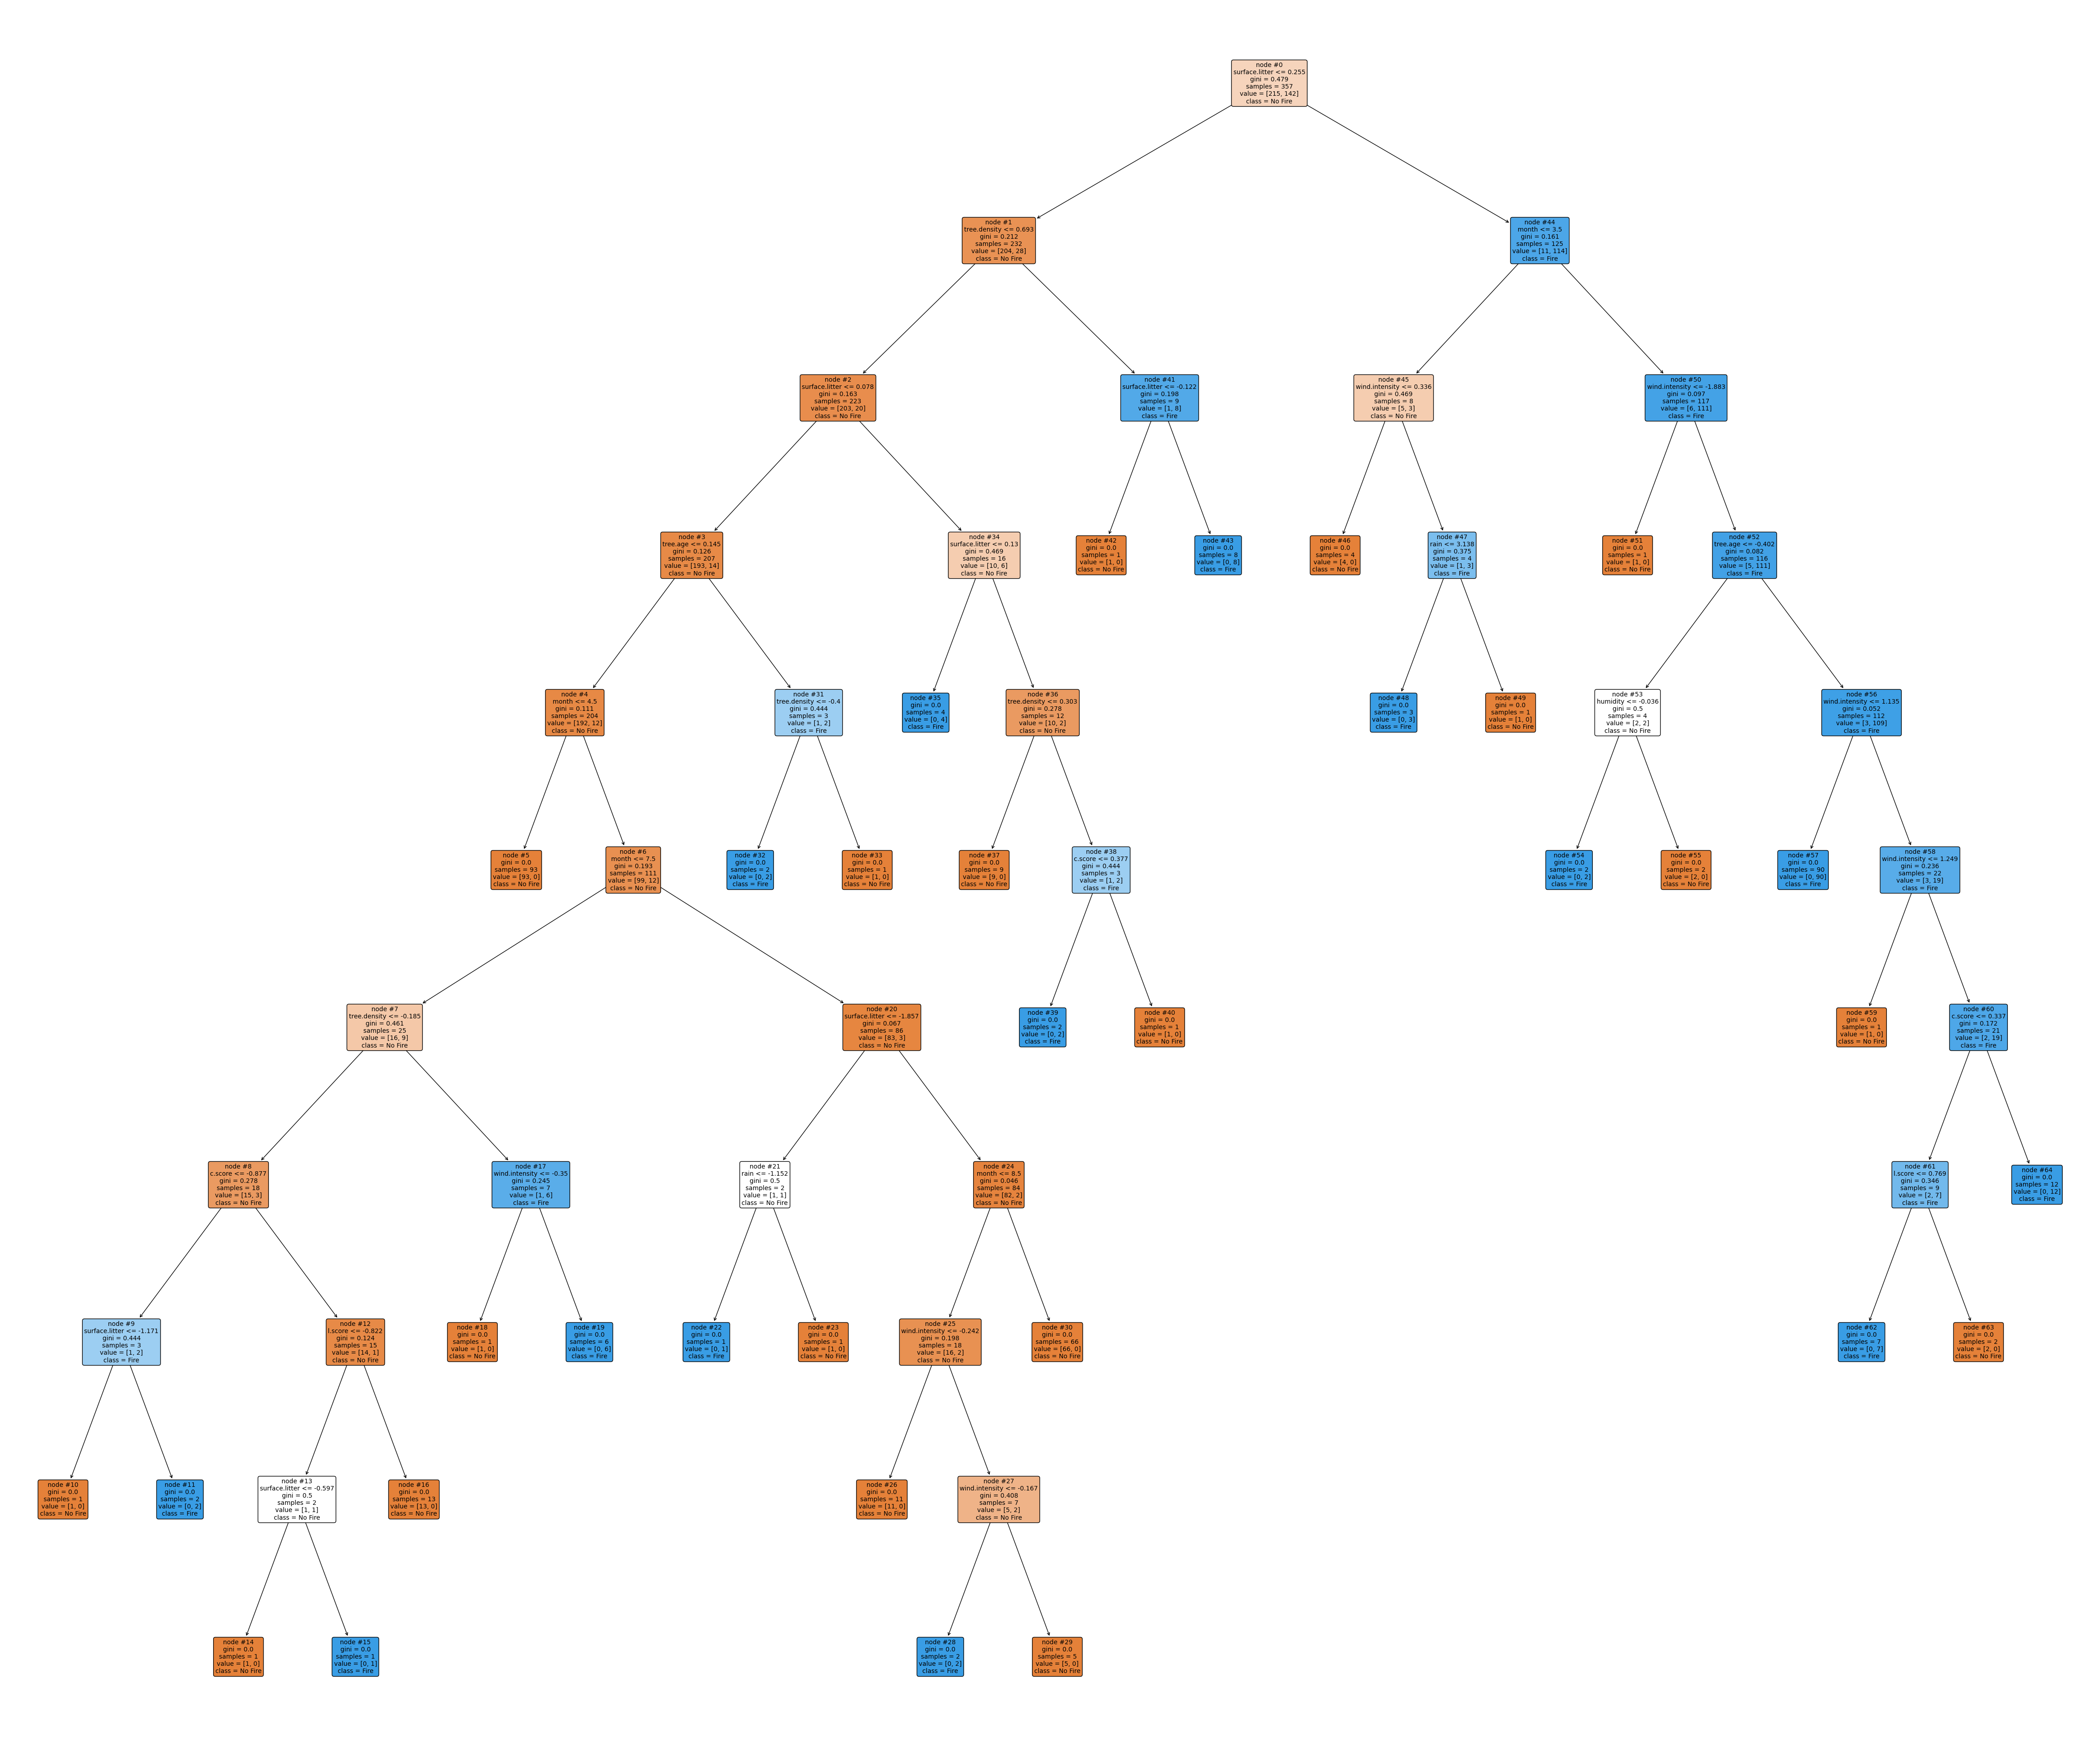

In [ ]:
# Extract the names of columns from the dataset X to use in the tree visualization
features = list(X_scaled.columns)

# Create a figure with dimensions (20 by 20)
plt.figure(figsize = (60, 50))

"""
Visualise the decision tree
feature_names=features: Uses the extracted feature names
rounded=True: Rounds node edges for a smoother visual appearance
node_ids=True: Displays node IDs for referencing specific decision points.
class_names=['Not Died', 'Died']: Specifies the labels for the two classes in target variable
"""
tree.plot_tree(
    d_tree,
    feature_names = features,
    filled = True,
    fontsize = 10,
    rounded=True,
    node_ids = True,
    class_names = ['No Fire', 'Fire']
)

plt.show()

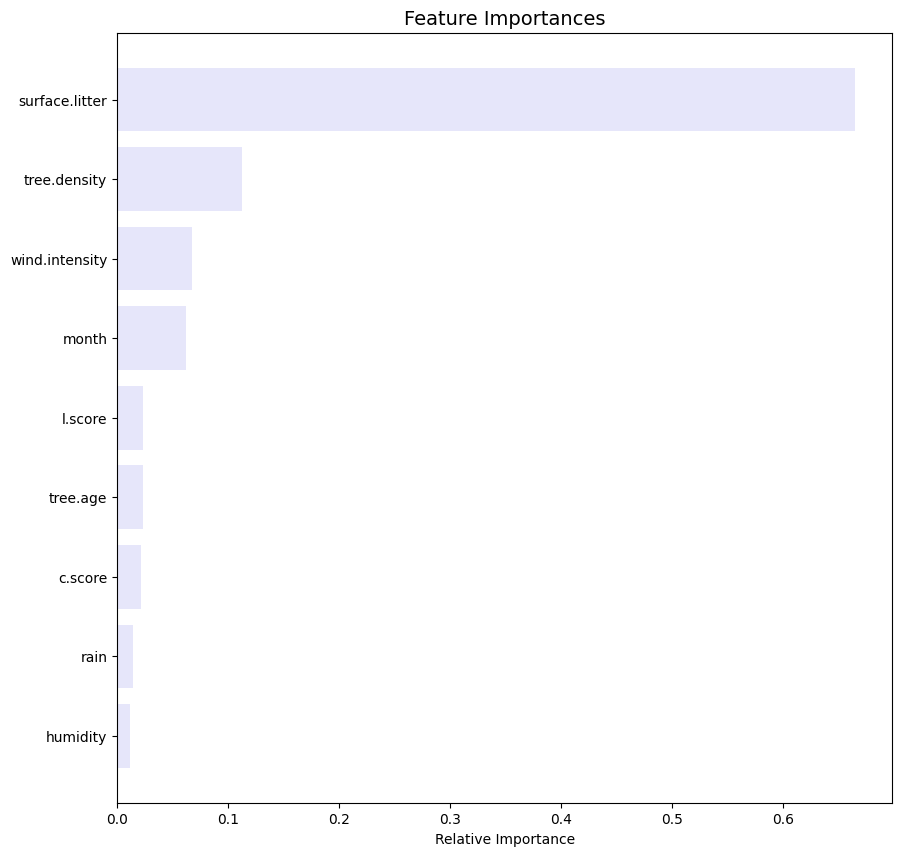

In [ ]:
# Plot the feature importance
importances = d_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances', fontsize = 14)
plt.barh(range(len(indices)), importances[indices], color = colors[0], align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 10)
plt.show()

roc_auc_score for DecisionTree:  1.0


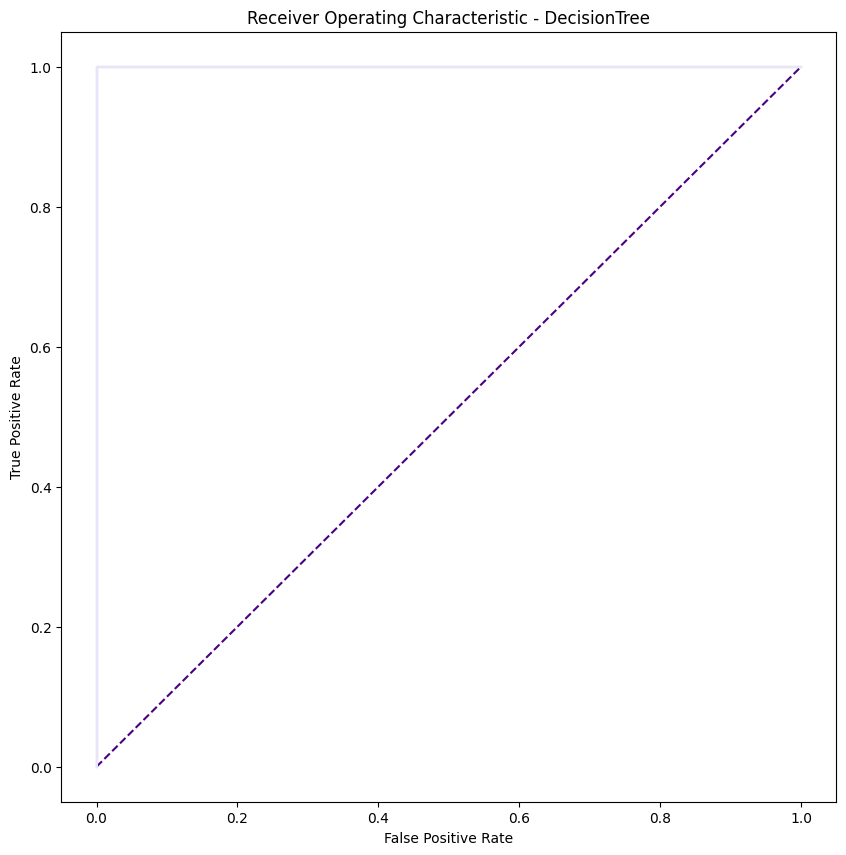

In [ ]:
y_score = d_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_pred_test_dtree, y_score)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_pred_test_dtree, y_score))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate, c = colors[1])
plt.plot([0, 1], ls="--", c = colors[1])
plt.plot([0, 0], [1, 0], c =  colors[0]), plt.plot([1, 1], c = colors[0] )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*   The model failed to generalise and seems to overfit the data.
*   Hyper Parameter tuning required

## **Tuned Decision Trees**

In [ ]:
t0 = time.time()

# Choose the type of classifier
# Assigns different weights to classes to address potential class imbalance.
# Class 1 receives more weight (0.6)
d_tree_tuned = DecisionTreeClassifier(
    random_state = 3,
    class_weight = {0: 0.4, 1: 0.6},
    splitter = 'best',
    #min_samples_split = 30
)

# Grid of parameters to choose from
# Creates a dictionary of parameters to explore during grid search optimization.
"""
max_depth: Controls the depth of the decision tree, preventing overfitting.
criterion: Specifies the splitting criterion to use ('gini' or 'entropy').
min_samples_leaf: Sets the minimum number of samples required at a leaf node, affecting model complexity.
max_features: The number or percentage of features to consider when looking for the best split.
min_samples_split: The minimum number of samples required to split an internal node.
splitter: The strategy used to choose the split at each node.
"""
parameters = {'max_depth': np.arange(3,7,1),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 10, 1),
              'max_features': [0.3, 0.6, 0.9],
              'min_samples_split': np.arange(1, 10, 1),
              #'splitter': ['best', 'random']
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
"""
Creates a scorer object to evaluate model performance during grid search.
Focuses on recall score for class 1, prioritizing identifying true positives for that class.
"""
scorer = metrics.make_scorer(f1_score)

# Run the grid search
"""
Initializes a GridSearchCV object to perform hyperparameter tuning.
d_tree_tuned: The base classifier to tune.
parameters: The grid of parameters to explore.
scoring=scorer: The scorer to use for evaluation.
cv=5: Performs 5-fold cross-validation for robust performance estimation.
"""
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5, verbose = 4)

# Execute the grid search process on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_obj.best_params_)
print("Highest Performance score found: ", grid_obj.best_score_)

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

t1 = round(time.time() - t0, 2)
train_time_list.append(t1)

Streaming output truncated to the last 5000 lines.
[CV 3/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=6, min_samples_split=9;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=6, min_samples_split=9;, score=0.893 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=6, min_samples_split=9;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=7, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=7, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=7, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=0.9, min_samples_leaf=7, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=gin

In [ ]:
print("Best Model: ", grid_obj.best_estimator_)

Best Model:  DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=6,
                       max_features=0.6, min_samples_leaf=6, random_state=3)


In [ ]:
df_dtree_tuned = pd.DataFrame(grid_obj.cv_results_)


In [ ]:
df_dtree_tuned.to_csv(r'/content/drive/MyDrive/Assignment 1/decision tree cv results.csv', index = False, header=True)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       215
           1       0.88      0.94      0.91       142

    accuracy                           0.93       357
   macro avg       0.92      0.93      0.92       357
weighted avg       0.93      0.93      0.93       357

True Positives =  134
True Negatives =  197
Accuracy =  0.93
False Positive Rate =  0.08
False Negative Rate =  0.06
Sensitivity (True Positive Rate)=  0.94
Specificity (True Negative Rate) =  0.92
Precision =  0.88
Recall =  0.94
F1 Score =  0.91
Error Rate =  0.07


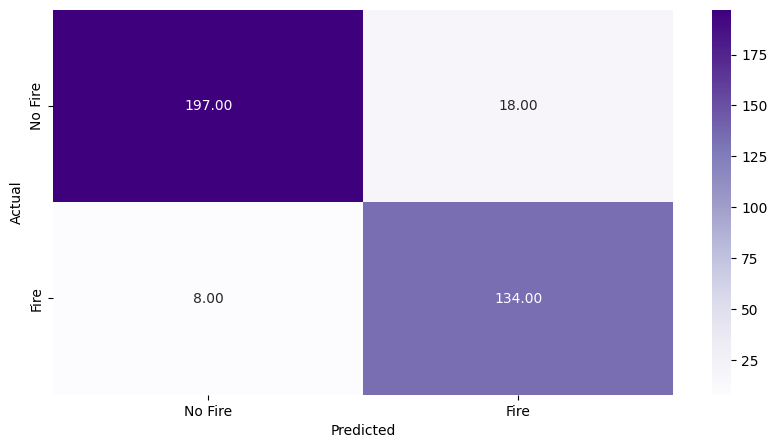

(0.88, 0.94, 0.91, 0.94, 0.92)

In [ ]:
# Checking performance on the training data
y_pred_train_dtree_tuned = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_dtree_tuned)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.79      0.92      0.85        24

    accuracy                           0.91        90
   macro avg       0.88      0.91      0.89        90
weighted avg       0.92      0.91      0.91        90

True Positives =  22
True Negatives =  60
Accuracy =  0.91
False Positive Rate =  0.09
False Negative Rate =  0.08
Sensitivity (True Positive Rate)=  0.92
Specificity (True Negative Rate) =  0.91
Precision =  0.79
Recall =  0.92
F1 Score =  0.85
Error Rate =  0.09


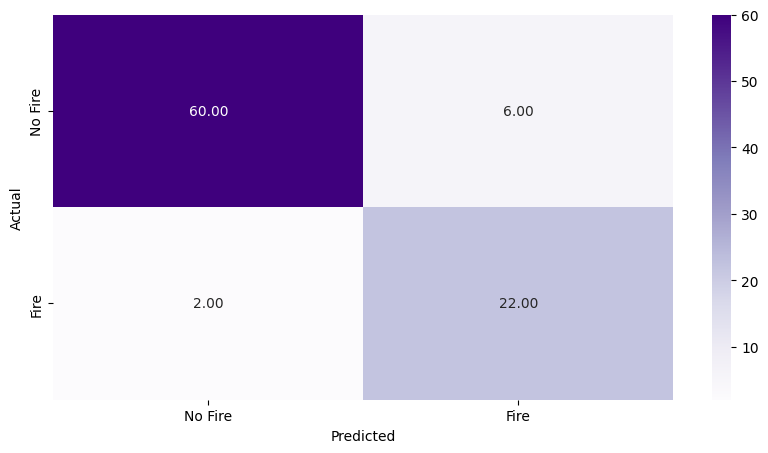

In [ ]:
# Checking performance on the testing data
y_pred_test_dtree_tuned = d_tree_tuned.predict(X_test)
#metrics_score(y_test, y_pred_test_dtree_tuned)
p_dtree_tuned, r_dtree_tuned, f_dtree_tuned, se_dtree_tuned, sp_dtree_tuned = metrics_score(y_test, y_pred_test_dtree_tuned)
precision_list.append(p_dtree_tuned)
recall_list.append(r_dtree_tuned)
f1_list.append(f_dtree_tuned)
sensitivity_list.append(se_dtree_tuned)
specificity_list.append(sp_dtree_tuned)
model_name_list.append('Tuned Decision Tree')

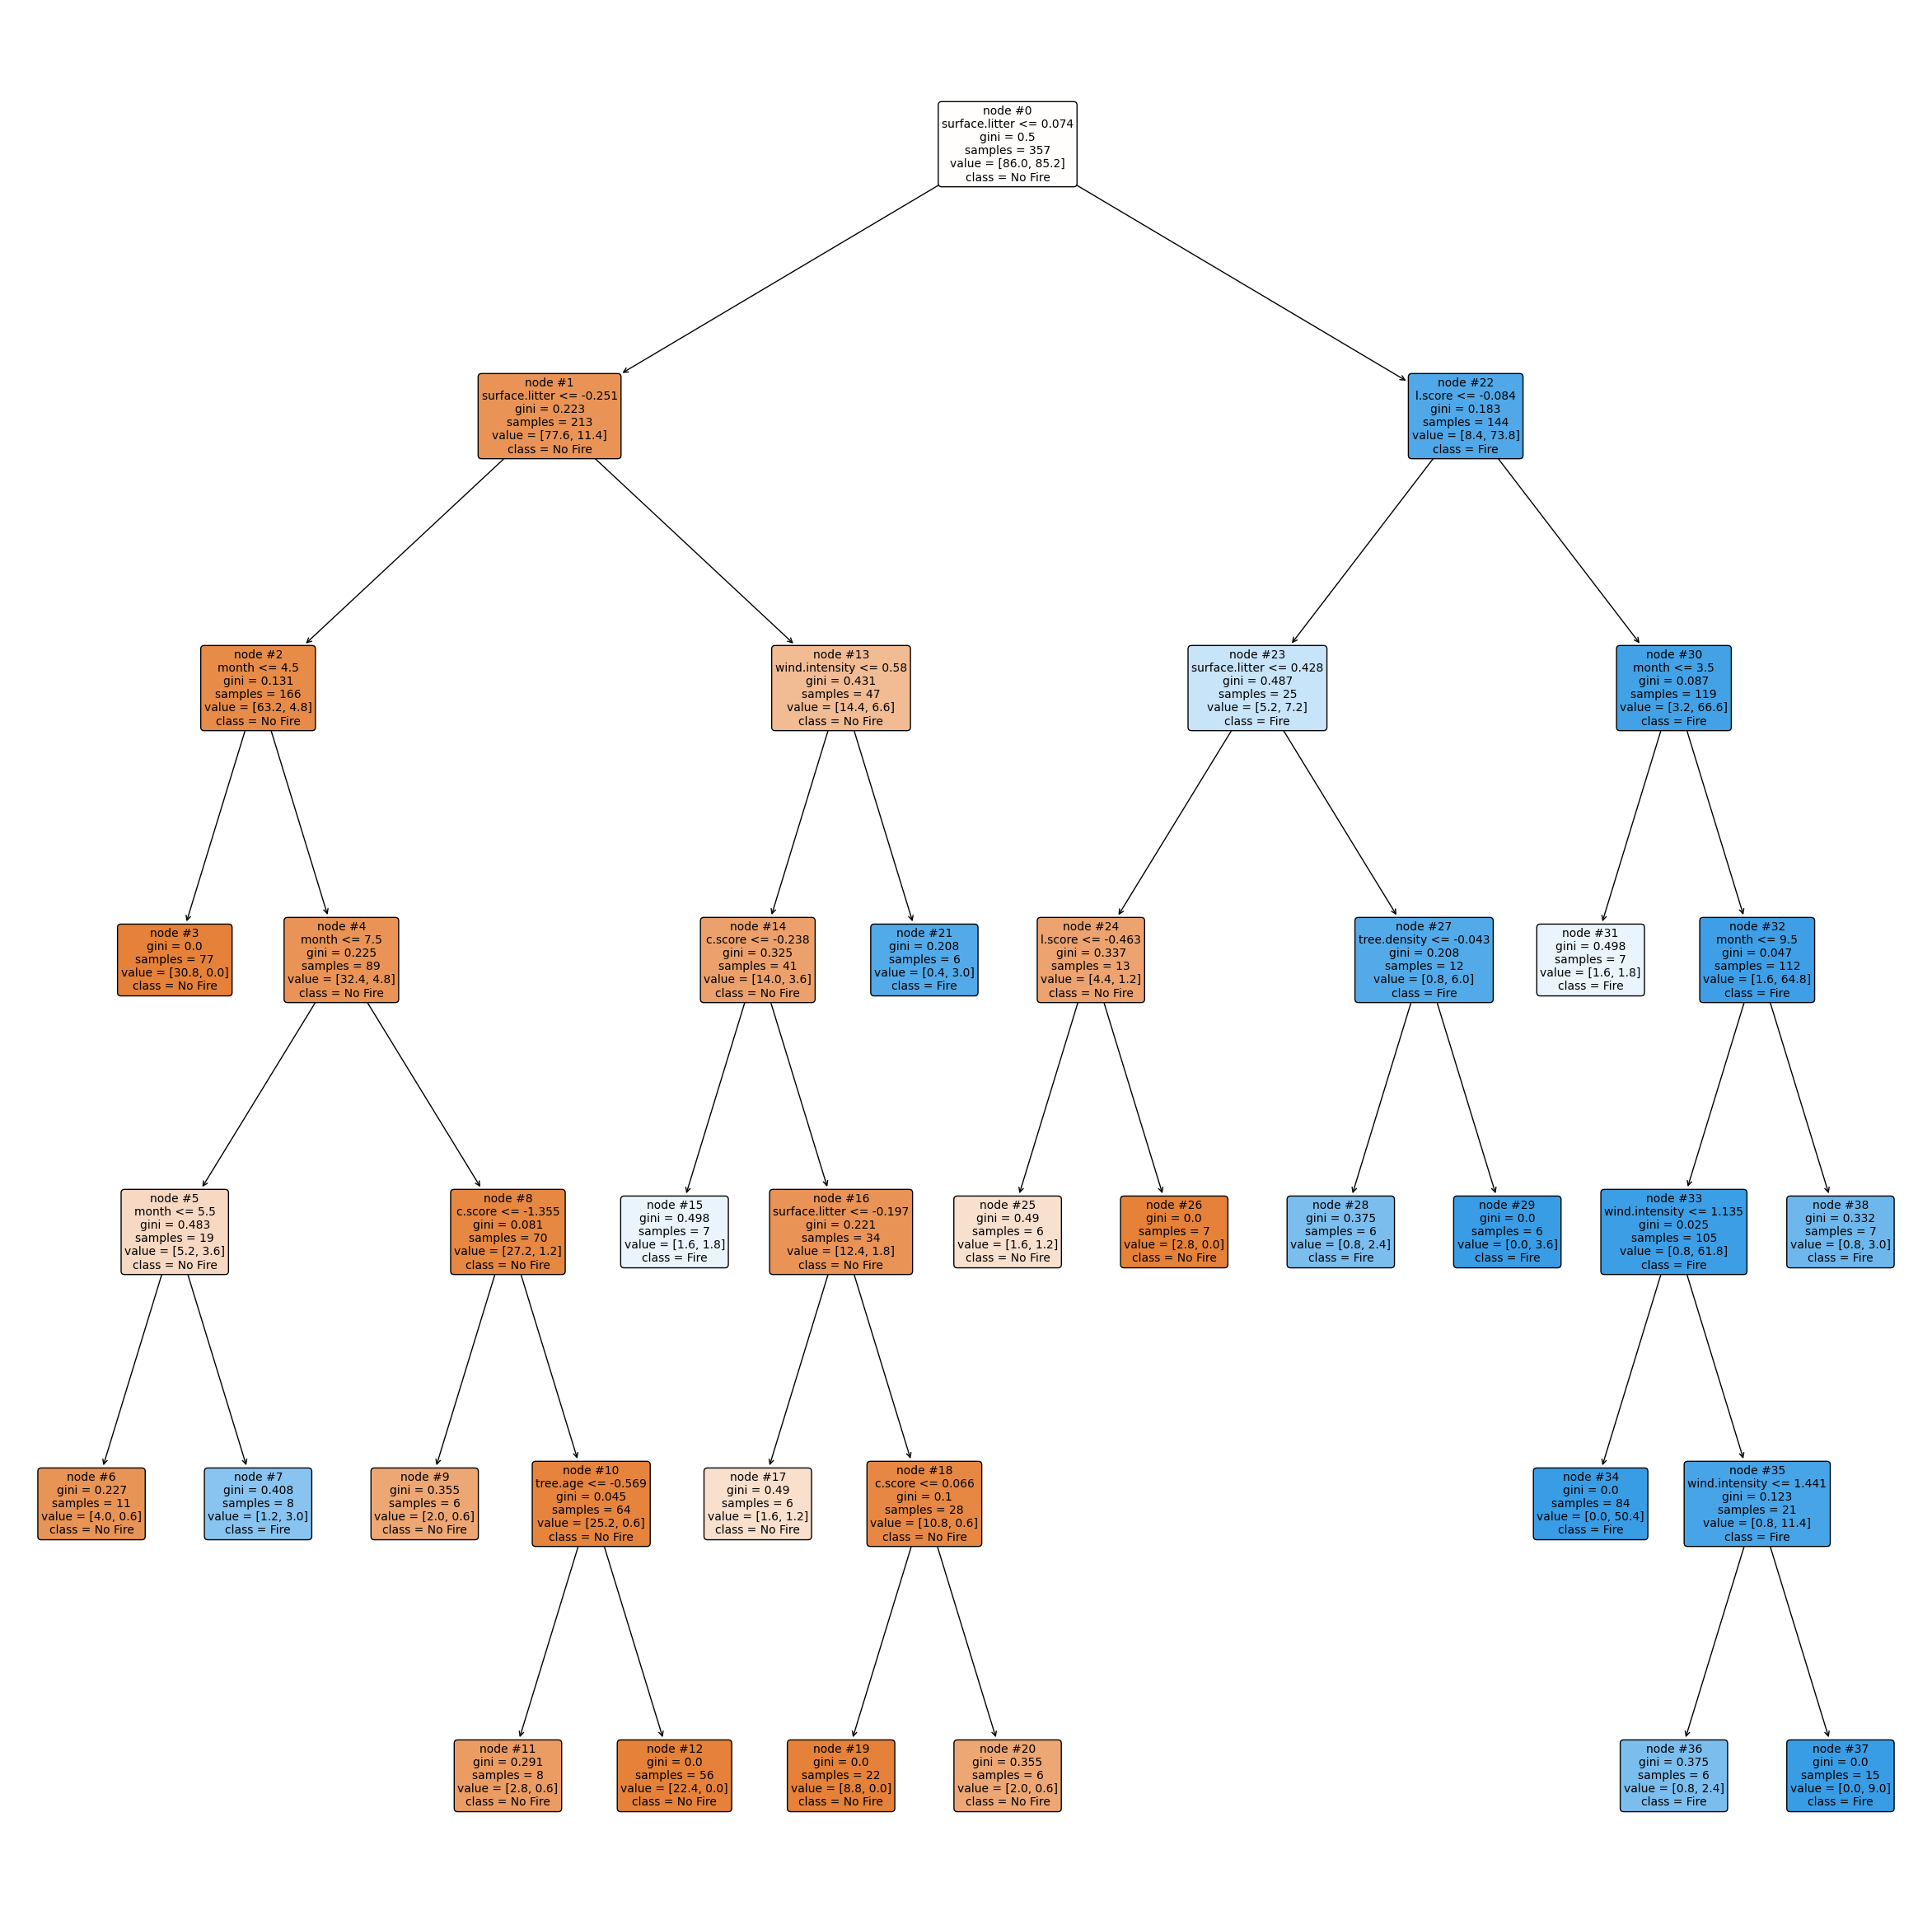

In [ ]:
# Extract the names of columns from the dataset X to use in the tree visualization
features = list(X_scaled.columns)

# Create a figure with dimensions (20 by 20)
plt.figure(figsize = (30, 30))

"""
Visualise the tuned decision tree
feature_names=features: Uses the extracted feature names
rounded=True: Rounds node edges for a smoother visual appearance
node_ids=True: Displays node IDs for referencing specific decision points.
class_names=['Not Died', 'Died']: Specifies the labels for the two classes in target variable
"""
tree.plot_tree(
    d_tree_tuned,
    feature_names = features,
    filled = True,
    fontsize = 10,
    rounded=True,
    node_ids = True,
    class_names = ['No Fire', 'Fire']
)

plt.show()

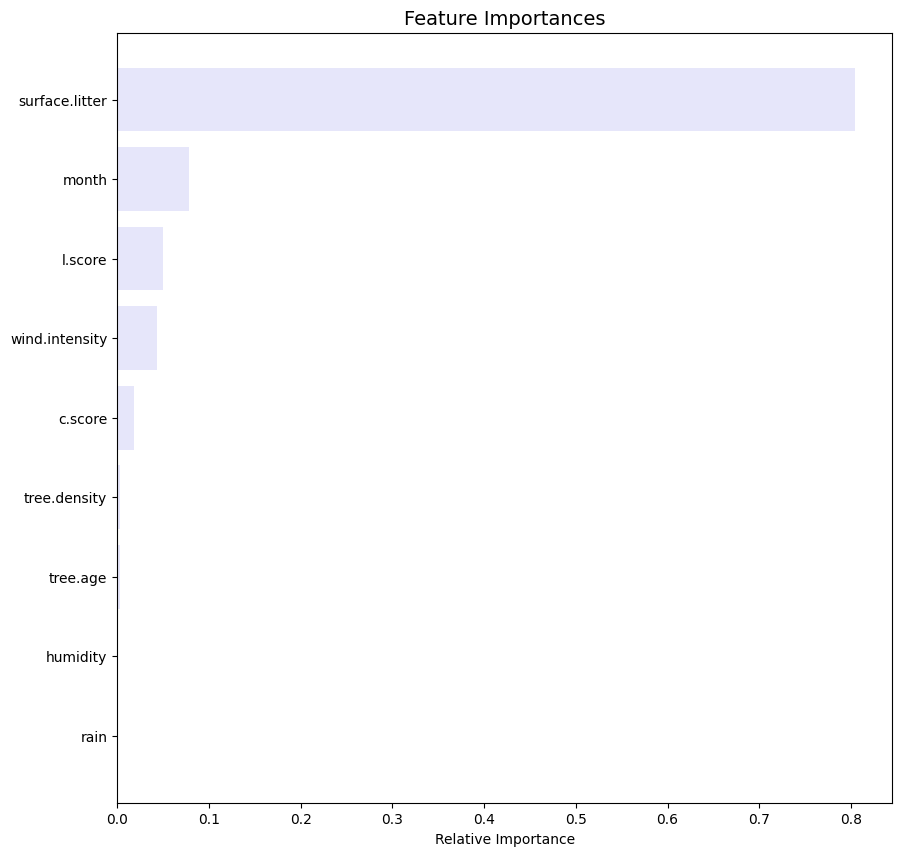

In [ ]:
# Plot the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances', fontsize = 14)
plt.barh(range(len(indices)), importances[indices], color = colors[0], align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 10)
plt.show()

roc_auc_score for Tuned DecisionTree:  1.0


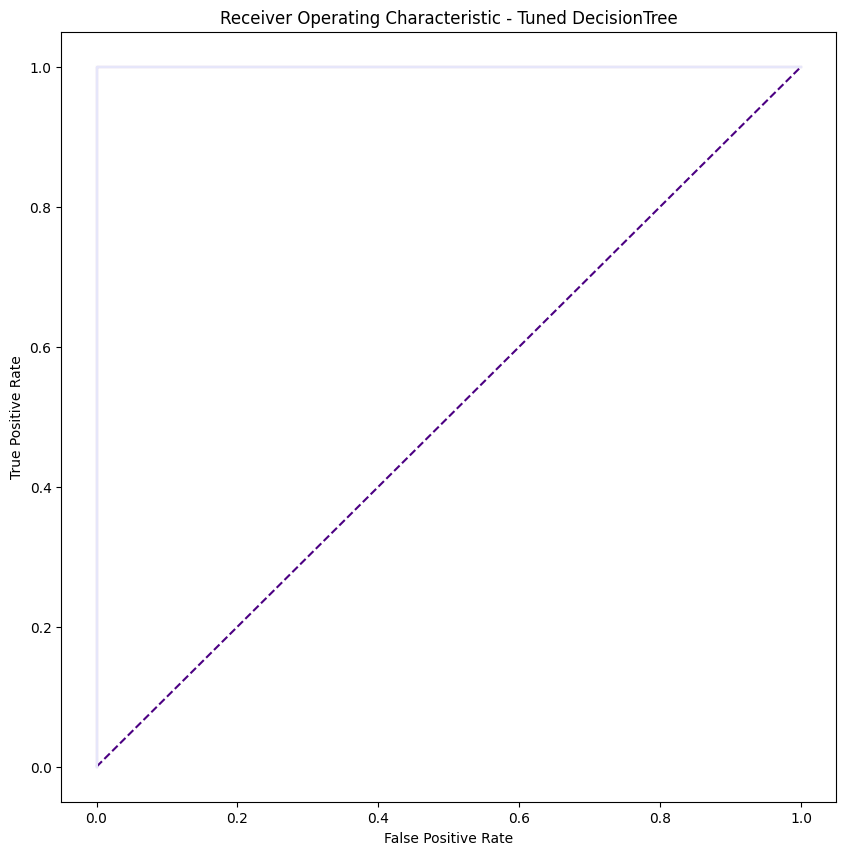

In [ ]:
y_score = d_tree_tuned.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_pred_test_dtree_tuned, y_score)
print('roc_auc_score for Tuned DecisionTree: ', roc_auc_score(y_pred_test_dtree_tuned, y_score))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Tuned DecisionTree')
plt.plot(false_positive_rate, true_positive_rate, c = colors[1])
plt.plot([0, 1], ls="--", c = colors[1])
plt.plot([0, 0], [1, 0], c =  colors[0]), plt.plot([1, 1], c = colors[0] )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#import sklearn
#print(sklearn.metrics.SCORERS.keys())

## **Random Forest**

In [ ]:
t0 = time.time()

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(
    random_state = 3,
    class_weight = {0: 0.4, 1: 0.6}
)

# Grid of parameters to choose from
"""
n_estimators: The number of trees in the forest.
min_samples_leaf: The minimum number of samples required at a leaf node.
max_features: The number of features to consider at each split.
"""

params_rf = {
        "n_estimators": [100, 300, 500],
        "min_samples_leaf": np.arange(5, 30, 5),
        "max_features": [0.5, 0.7, 0.9],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, verbose = 4)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_obj.best_params_)
print("Highest Performance score found: ", grid_obj.best_score_)
print("Best Model: ", grid_obj.best_estimator_)



# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

t1 = round(time.time() - t0, 2)
train_time_list.append(t1)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_features=0.5, min_samples_leaf=5, n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END max_features=0.5, min_samples_leaf=5, n_estimators=100;, score=0.867 total time=   0.2s
[CV 3/5] END max_features=0.5, min_samples_leaf=5, n_estimators=100;, score=0.867 total time=   0.2s
[CV 4/5] END max_features=0.5, min_samples_leaf=5, n_estimators=100;, score=0.906 total time=   0.2s
[CV 5/5] END max_features=0.5, min_samples_leaf=5, n_estimators=100;, score=0.906 total time=   0.2s
[CV 1/5] END max_features=0.5, min_samples_leaf=5, n_estimators=300;, score=0.852 total time=   0.6s
[CV 2/5] END max_features=0.5, min_samples_leaf=5, n_estimators=300;, score=0.881 total time=   0.6s
[CV 3/5] END max_features=0.5, min_samples_leaf=5, n_estimators=300;, score=0.867 total time=   0.6s
[CV 4/5] END max_features=0.5, min_samples_leaf=5, n_estimators=300;, score=0.906 total time=   0.6s
[CV 5/5] END max_features=0.5

In [ ]:
df_rf_tuned = pd.DataFrame(grid_obj.cv_results_)
df_rf_tuned.to_csv(r'/content/drive/MyDrive/Assignment 1/rf cv results.csv', index = False, header=True)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       215
           1       0.94      0.95      0.94       142

    accuracy                           0.96       357
   macro avg       0.95      0.95      0.95       357
weighted avg       0.96      0.96      0.96       357

True Positives =  135
True Negatives =  206
Accuracy =  0.96
False Positive Rate =  0.04
False Negative Rate =  0.05
Sensitivity (True Positive Rate)=  0.95
Specificity (True Negative Rate) =  0.96
Precision =  0.94
Recall =  0.95
F1 Score =  0.94
Error Rate =  0.04


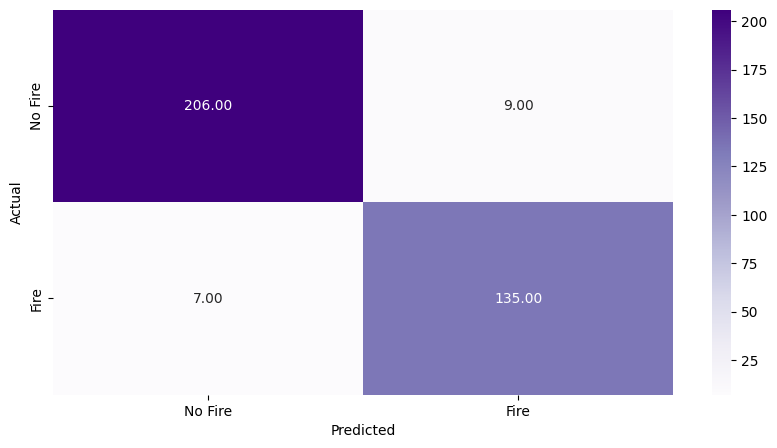

(0.94, 0.95, 0.94, 0.95, 0.96)

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.81      0.92      0.86        24

    accuracy                           0.92        90
   macro avg       0.89      0.92      0.90        90
weighted avg       0.93      0.92      0.92        90

True Positives =  22
True Negatives =  61
Accuracy =  0.92
False Positive Rate =  0.08
False Negative Rate =  0.08
Sensitivity (True Positive Rate)=  0.92
Specificity (True Negative Rate) =  0.92
Precision =  0.81
Recall =  0.92
F1 Score =  0.86
Error Rate =  0.08


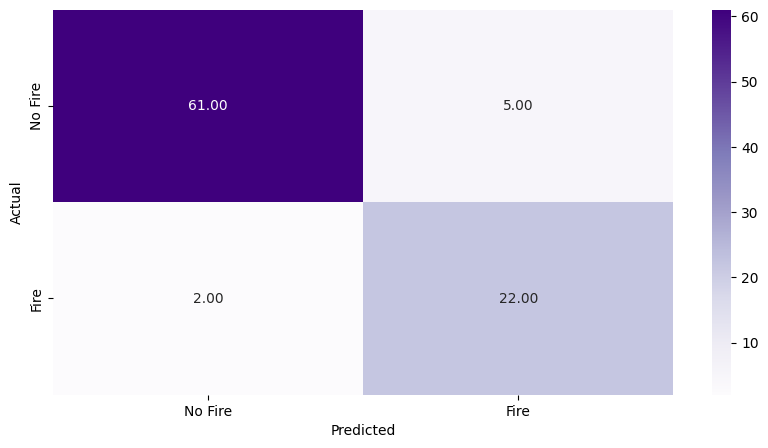

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

#metrics_score(y_test, y_pred_test_rf_tuned)

p_rf, r_rf, f_rf, se_rf, sp_rf = metrics_score(y_test, y_pred_test_rf_tuned)
precision_list.append(p_rf)
recall_list.append(r_rf)
f1_list.append(f_rf)
sensitivity_list.append(se_rf)
specificity_list.append(sp_rf)
model_name_list.append('Tuned Random Forest')

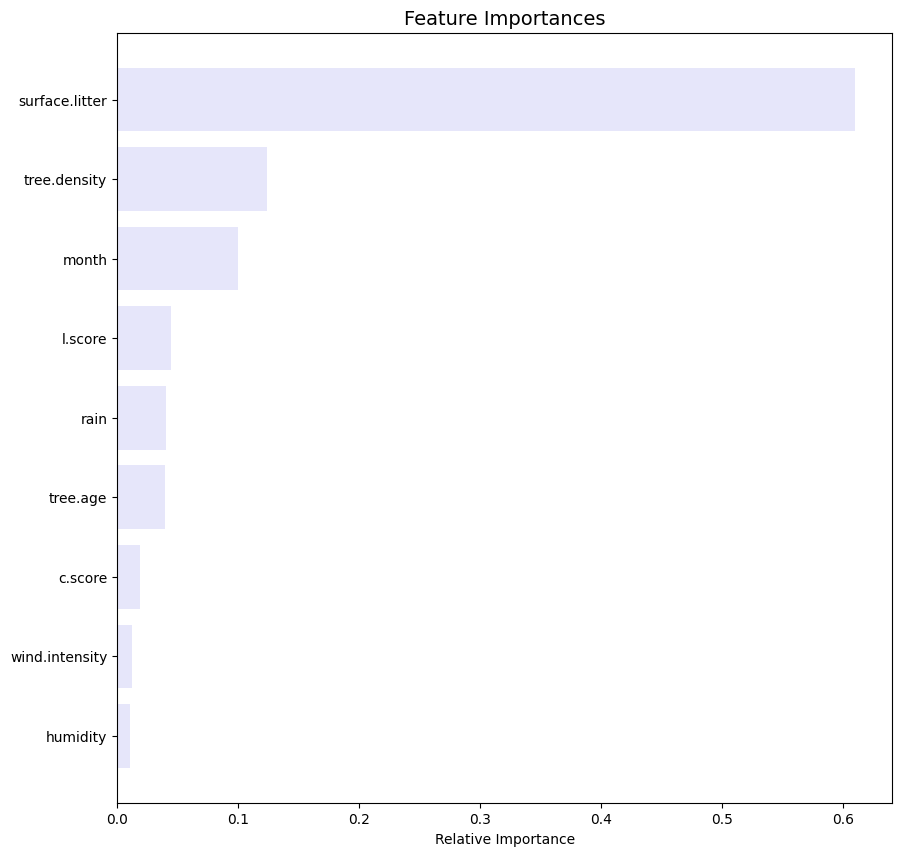

In [ ]:
# Plot the feature importance
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances', fontsize = 14)
plt.barh(range(len(indices)), importances[indices], color = colors[0], align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 10)
plt.show()

## **XGBoost**

In [ ]:
t0 = time.time()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05],
    'gamma': [0, 0.5],
    'reg_lambda': [0, 1.0],
    'scale_pos_weight': [1, 3, 5]
}


# Instantiate the XGBoost classifier
xg_estimator = xgb.XGBClassifier(use_label_encoder=False)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(xg_estimator, param_grid, cv=3, scoring='accuracy', verbose = 4)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xg_estimator = grid_search.best_estimator_

# Print the best parameters and highest accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest Performance Score found: ", grid_search.best_score_)
print("Best Model: ", grid_search.best_estimator_)




# Fitting the best algorithm to the training data
xg_estimator.fit(X_train, y_train)

t1 = round(time.time() - t0, 2)
train_time_list.append(t1)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.908 total time=   0.1s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.866 total time=   0.1s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.908 total time=   0.1s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.891 total time=   0.1s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.874 total time=   0.1s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.908 total time=   0.1s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5;, score=0.866 total time=   0.1s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5;, s

In [ ]:
df_xg_tuned = pd.DataFrame(grid_obj.cv_results_)
df_xg_tuned.to_csv(r'/content/drive/MyDrive/Assignment 1/xgb cv results.csv', index = False, header=True)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       215
           1       1.00      0.99      0.99       142

    accuracy                           0.99       357
   macro avg       1.00      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357

True Positives =  140
True Negatives =  215
Accuracy =  0.99
False Positive Rate =  0.0
False Negative Rate =  0.01
Sensitivity (True Positive Rate)=  0.99
Specificity (True Negative Rate) =  1.0
Precision =  1.0
Recall =  0.99
F1 Score =  0.99
Error Rate =  0.01


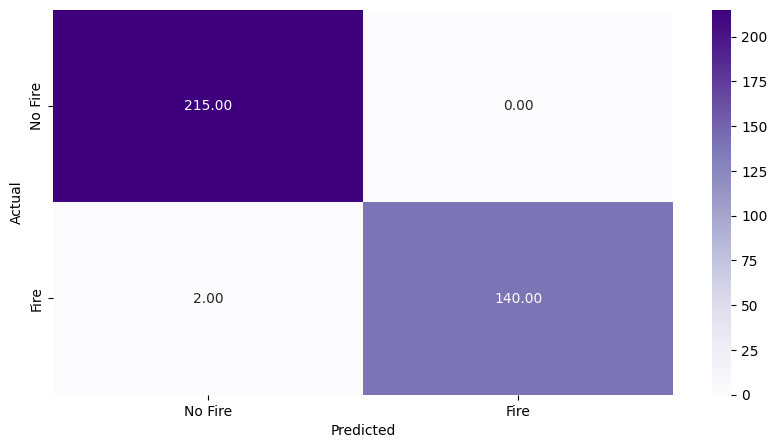

(1.0, 0.99, 0.99, 0.99, 1.0)

In [ ]:
# Make predictions on the train data
y_pred_train_xg = xg_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_xg)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.88      0.92      0.90        24

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.93        90
weighted avg       0.95      0.94      0.94        90

True Positives =  22
True Negatives =  63
Accuracy =  0.94
False Positive Rate =  0.05
False Negative Rate =  0.08
Sensitivity (True Positive Rate)=  0.92
Specificity (True Negative Rate) =  0.95
Precision =  0.88
Recall =  0.92
F1 Score =  0.9
Error Rate =  0.06


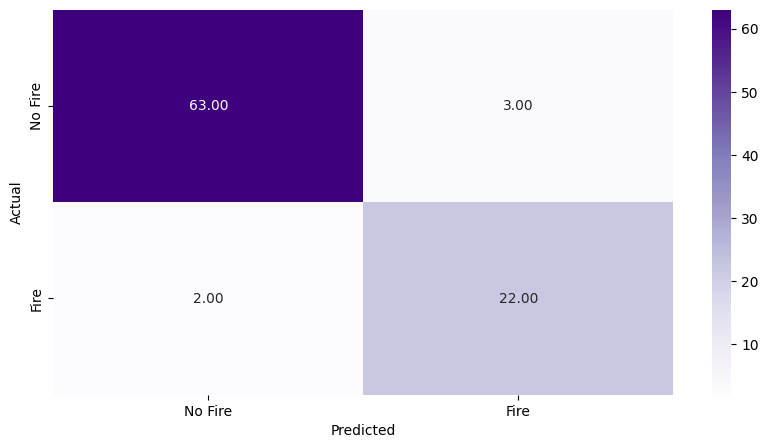

In [ ]:
# Make predictions on the train data
y_pred_test_xg = xg_estimator.predict(X_test)

#metrics_score(y_test, y_pred_test_xg)

p_xg, r_xg, f_xg, se_xg, sp_xg = metrics_score(y_test, y_pred_test_xg)
precision_list.append(p_xg)
recall_list.append(r_xg)
f1_list.append(f_xg)
sensitivity_list.append(se_xg)
specificity_list.append(sp_xg)
model_name_list.append('Tuned XG Boost')

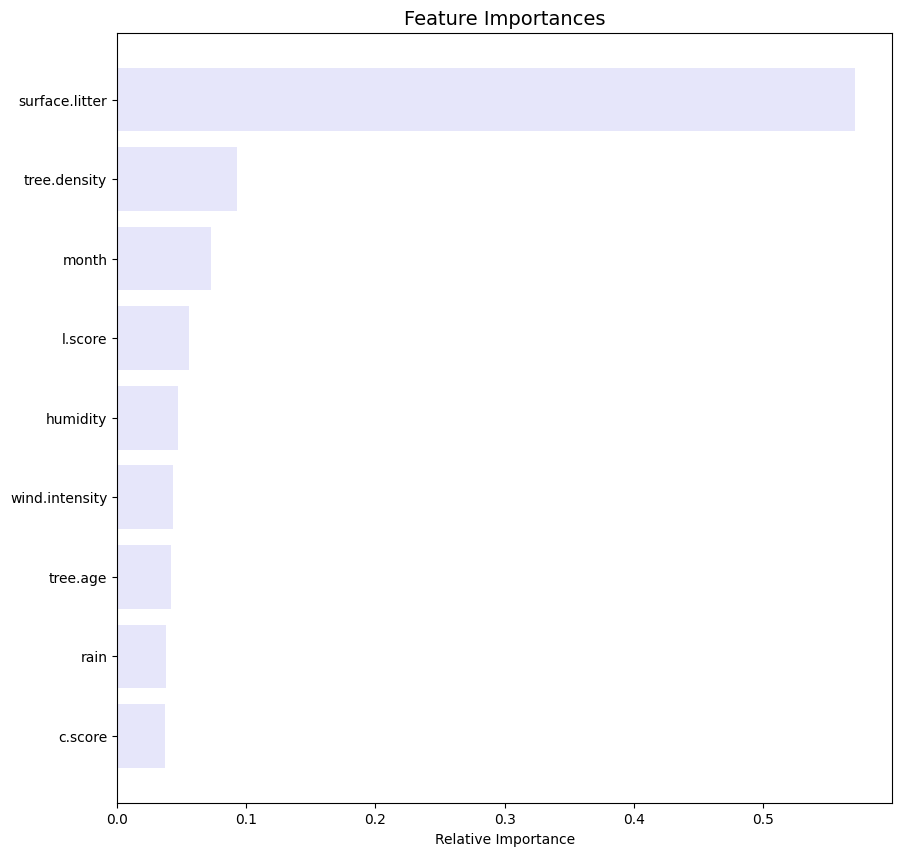

In [ ]:
# Plot the feature importance
importances = xg_estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances', fontsize = 14)
plt.barh(range(len(indices)), importances[indices], color = colors[0], align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 10)
plt.show()





## **Artificial Neural Network**

In [ ]:
backend.clear_session()
np.random.seed(3)
import random
random.seed(3)
tf.random.set_seed(3)

In [ ]:
t0 = time.time()

# build model
def model_build(hp):
  # sequential model
  model = Sequential()

  # add input layer
  model.add(Dense(
      units = hp.Int(name = 'Units_inp', min_value = 16, max_value = 32),
      activation = hp.Choice(name = 'inp_act', values = ['relu', 'tanh']),
      kernel_initializer = 'he_uniform',
      input_dim = X_train.shape[1],
      name = 'Input_Layer'
      ))
  model.add(Dropout(
      rate = hp.Choice(name  = 'drop_inp', values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
      name = 'Input_Drop'
  ))

  # add hidden layer(s)
  for i in range(hp.Int(name = 'num_layers', min_value = 1, max_value = 12)):
    model.add(Dense(
        units = hp.Int(name = 'Units_hid'+str(i), min_value = 2, max_value = 18),
        activation = hp.Choice(name = 'hid_act'+str(i), values = ['relu', 'tanh']),
        name = 'Hidden_'+str(i)
        ))
    model.add(Dropout(
        rate = hp.Choice(name  = 'drop_hid'+str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
        name = 'Hidden_Drop_'+str(i)
        ))

  # add output layer
  model.add(Dense(units = 1, activation = 'sigmoid', name = 'Output_Layer'))

  # compile model using Adam optimizer
  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate = hp.Choice('lr_com', values = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )

  return model



In [ ]:
# tune model using random search
tuner_ann = kt.Hyperband(
    model_build,
    objective = 'val_accuracy',
    max_epochs = 10,
    factor = 2,
    hyperband_iterations = 2,
    seed = 3,
    max_consecutive_failed_trials = 5,
    overwrite = True
)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner_ann.search(X_train,y_train,epochs=80,validation_split = 0.2, callbacks=[stop_early])

Trial 92 Complete [00h 00m 04s]
val_accuracy: 0.5555555820465088

Best val_accuracy So Far: 0.9166666865348816
Total elapsed time: 00h 05m 48s


In [ ]:
# get best parameters
tuner_ann.get_best_hyperparameters(num_trials = 1)[0].values

{'Units_inp': 29,
 'inp_act': 'tanh',
 'drop_inp': 0.1,
 'num_layers': 4,
 'Units_hid0': 17,
 'hid_act0': 'tanh',
 'drop_hid0': 0.3,
 'lr_com': 0.005,
 'Units_hid1': 6,
 'hid_act1': 'relu',
 'drop_hid1': 0.1,
 'Units_hid2': 13,
 'hid_act2': 'tanh',
 'drop_hid2': 0.6,
 'Units_hid3': 15,
 'hid_act3': 'relu',
 'drop_hid3': 0.5,
 'Units_hid4': 2,
 'hid_act4': 'tanh',
 'drop_hid4': 0.1,
 'Units_hid5': 11,
 'hid_act5': 'tanh',
 'drop_hid5': 0.4,
 'Units_hid6': 17,
 'hid_act6': 'relu',
 'drop_hid6': 0.3,
 'Units_hid7': 11,
 'hid_act7': 'relu',
 'drop_hid7': 0.8,
 'Units_hid8': 4,
 'hid_act8': 'relu',
 'drop_hid8': 0.7,
 'Units_hid9': 6,
 'hid_act9': 'relu',
 'drop_hid9': 0.7,
 'Units_hid10': 14,
 'hid_act10': 'relu',
 'drop_hid10': 0.6,
 'Units_hid11': 8,
 'hid_act11': 'tanh',
 'drop_hid11': 0.5,
 'tuner/epochs': 5,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner_ann.get_best_hyperparameters(num_trials = 1)[0]

# Build the model with the optimal hyperparameters
model_ann = tuner_ann.hypermodel.build(best_hps)

In [ ]:
#t0 = time.time()

#model_ann = Sequential()
#model_ann.add(Dense(22, activation = 'tanh', kernel_initializer = 'he_uniform', input_dim = X_train.shape[1]))
#model_ann.add(Dense(13, activation = 'tanh'))
#model_ann.add(Dropout(0.5))
#model_ann.add(Dense(1, activation = 'sigmoid'))

#Compiling the ANN with Adam optimizer and binary cross entropy loss function
#optimizer = tf.keras.optimizers.Adam(0.0005)
#model_ann.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
# show architecture of optimal ann model

model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 29)                290       
                                                                 
 Input_Drop (Dropout)        (None, 29)                0         
                                                                 
 Hidden_0 (Dense)            (None, 17)                510       
                                                                 
 Hidden_Drop_0 (Dropout)     (None, 17)                0         
                                                                 
 Hidden_1 (Dense)            (None, 6)                 108       
                                                                 
 Hidden_Drop_1 (Dropout)     (None, 6)                 0         
                                                                 
 Hidden_2 (Dense)            (None, 13)               

In [ ]:
# model weights
for layer in model_ann.layers:
    weights = layer.get_weights()
    print(f'Layer {layer} has followiing weights \n {weights}')

Layer <keras.layers.core.dense.Dense object at 0x7bcb8b464fa0> has followiing weights 
 [array([[-0.48808554,  0.6775142 , -0.10410684, -0.7920237 , -0.12265873,
         0.5039562 , -0.5006397 ,  0.10482478, -0.6837919 ,  0.59655917,
        -0.41734028, -0.08247554, -0.78864604, -0.1122179 , -0.12357622,
         0.44712818,  0.39602315, -0.39014262,  0.56353927,  0.22246516,
        -0.10861224,  0.02320248,  0.23449254,  0.15796643,  0.19504249,
         0.74377453,  0.16542047,  0.16988927, -0.5896611 ],
       [ 0.3663417 , -0.59228426,  0.4905455 , -0.201765  ,  0.6589242 ,
        -0.2679063 ,  0.07877338,  0.03498495,  0.35645783,  0.7200476 ,
         0.61430025, -0.3251691 , -0.334307  ,  0.14809304,  0.6266912 ,
         0.5348939 ,  0.1675595 , -0.7245316 , -0.03272176,  0.75537026,
        -0.7304306 , -0.17342716, -0.26038593, -0.51454616,  0.5467303 ,
        -0.20115936, -0.55509394,  0.3751799 ,  0.3155682 ],
       [ 0.24404526,  0.7844095 , -0.28186774, -0.48295254,

In [ ]:
for layer in model_ann.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f'The layer {layer.name} has a dropout rate of {layer.rate}.')

The layer Input_Drop has a dropout rate of 0.1.
The layer Hidden_Drop_0 has a dropout rate of 0.3.
The layer Hidden_Drop_1 has a dropout rate of 0.1.
The layer Hidden_Drop_2 has a dropout rate of 0.6.
The layer Hidden_Drop_3 has a dropout rate of 0.5.


In [ ]:
for layer in model_ann.layers:
  if isinstance(layer, tf.keras.layers.Dense):
        print(f'The layer {layer.name} has activation functionL {layer.activation}.')

The layer Input_Layer has activation functionL <function tanh at 0x7bcb94cf41f0>.
The layer Hidden_0 has activation functionL <function tanh at 0x7bcb94cf41f0>.
The layer Hidden_1 has activation functionL <function relu at 0x7bcb94ec7e20>.
The layer Hidden_2 has activation functionL <function tanh at 0x7bcb94cf41f0>.
The layer Hidden_3 has activation functionL <function relu at 0x7bcb94ec7e20>.
The layer Output_Layer has activation functionL <function sigmoid at 0x7bcb94cf43a0>.


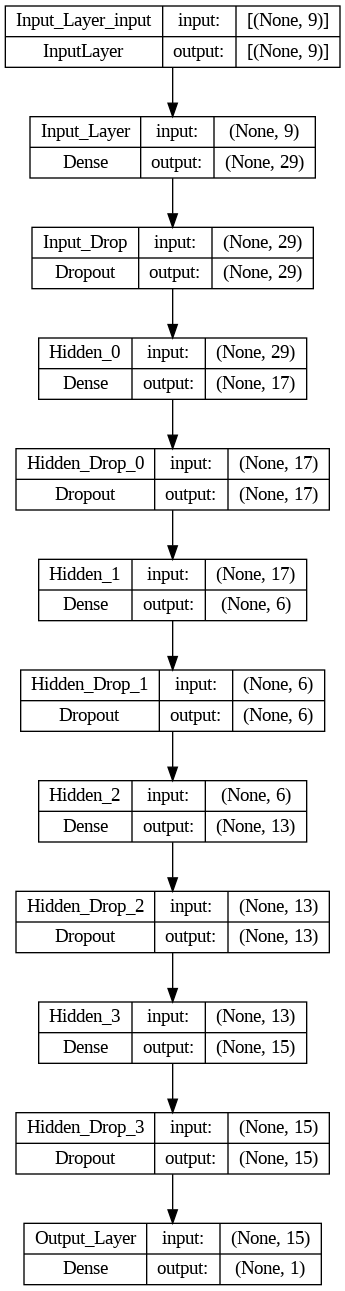

In [ ]:
tf.keras.utils.plot_model(model_ann,show_layer_names=True,show_shapes=True,show_dtype=False)

In [ ]:
history_ann = model_ann.fit(X_train,y_train,batch_size=16,epochs=80,verbose=1,validation_split = 0.2)

t1 = round(time.time() - t0, 2)
train_time_list.append(t1)

Epoch 1/80
18/18 [==============================] - 2s 21ms/step - loss: 0.7369 - accuracy: 0.5263 - val_loss: 0.6831 - val_accuracy: 0.5417
Epoch 2/80
18/18 [==============================] - 0s 6ms/step - loss: 0.6733 - accuracy: 0.6175 - val_loss: 0.6560 - val_accuracy: 0.5972
Epoch 3/80
18/18 [==============================] - 0s 6ms/step - loss: 0.6215 - accuracy: 0.7158 - val_loss: 0.5293 - val_accuracy: 0.8889
Epoch 4/80
18/18 [==============================] - 0s 7ms/step - loss: 0.5422 - accuracy: 0.7579 - val_loss: 0.4844 - val_accuracy: 0.7778
Epoch 5/80
18/18 [==============================] - 0s 5ms/step - loss: 0.4527 - accuracy: 0.8246 - val_loss: 0.3330 - val_accuracy: 0.8611
Epoch 6/80
18/18 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8386 - val_loss: 0.3904 - val_accuracy: 0.8472
Epoch 7/80
18/18 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.8386 - val_loss: 0.3338 - val_accuracy: 0.8889
Epoch 8/80
18/18 [=

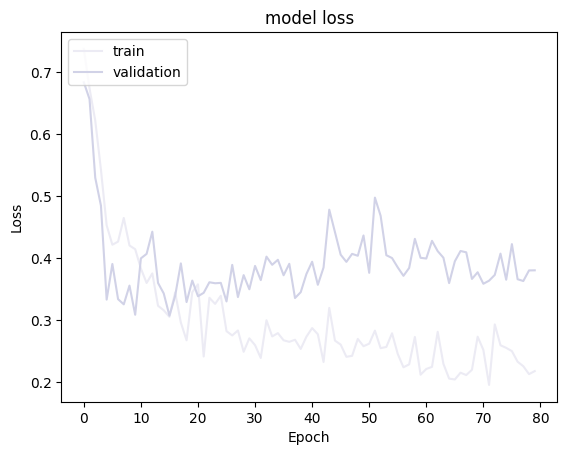

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

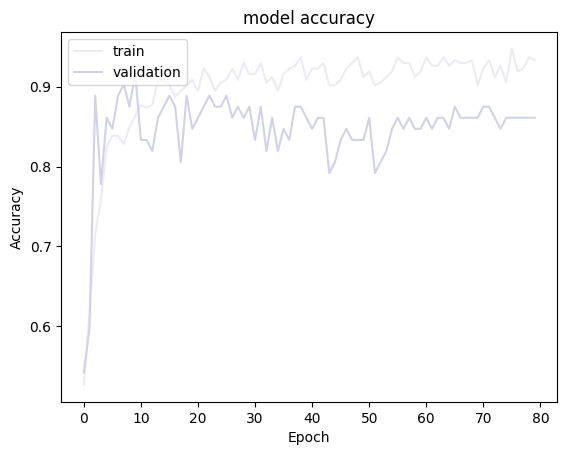

In [ ]:
#Plotting Train Accuracy vs Validation Accuracy
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       215
           1       0.98      0.84      0.90       142

    accuracy                           0.93       357
   macro avg       0.94      0.91      0.92       357
weighted avg       0.93      0.93      0.93       357

True Positives =  119
True Negatives =  213
Accuracy =  0.93
False Positive Rate =  0.01
False Negative Rate =  0.16
Sensitivity (True Positive Rate)=  0.84
Specificity (True Negative Rate) =  0.99
Precision =  0.98
Recall =  0.84
F1 Score =  0.9
Error Rate =  0.07


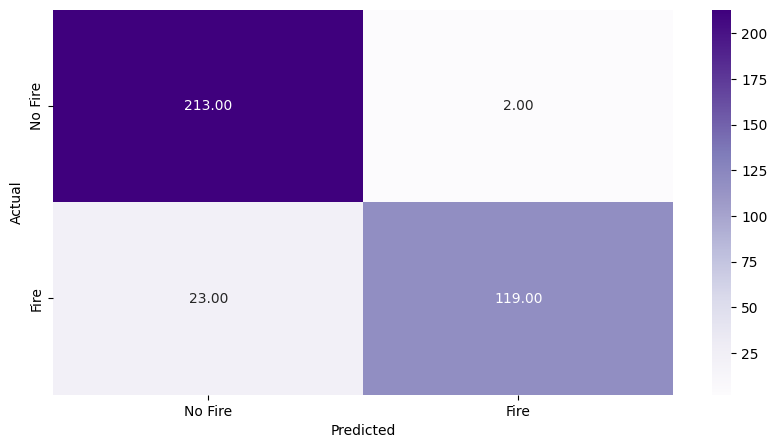

(0.98, 0.84, 0.9, 0.84, 0.99)

In [ ]:
y_pred_train_ann_prob=model_ann.predict(X_train)
# Convert probabilities to class labels
y_pred_train_ann = (y_pred_train_ann_prob > 0.5).astype(int)
metrics_score(y_train, y_pred_train_ann)

3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.88      0.88      0.88        24

    accuracy                           0.93        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.93      0.93      0.93        90

True Positives =  21
True Negatives =  63
Accuracy =  0.93
False Positive Rate =  0.05
False Negative Rate =  0.12
Sensitivity (True Positive Rate)=  0.88
Specificity (True Negative Rate) =  0.95
Precision =  0.88
Recall =  0.88
F1 Score =  0.88
Error Rate =  0.07


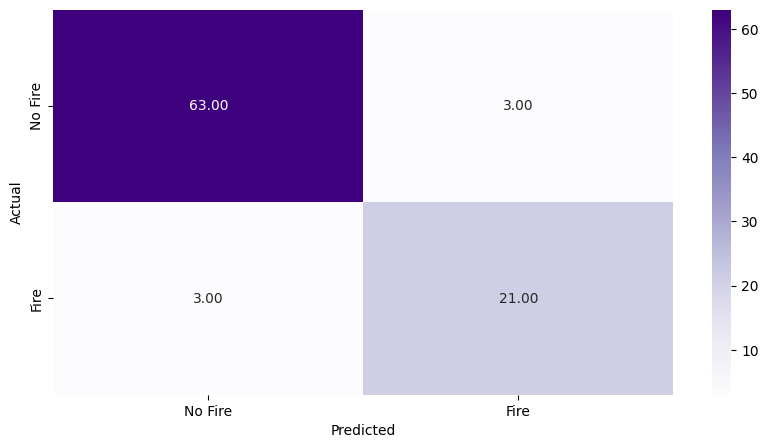

In [ ]:
# Make predictions on the train data
y_pred_test_ann_prob = model_ann.predict(X_test)

# Convert probabilities to class labels
y_pred_test_ann = (y_pred_test_ann_prob > 0.5).astype(int)



p_ann, r_ann, f_ann, se_ann, sp_ann = metrics_score(y_test, y_pred_test_ann)


In [ ]:
precision_list.append(p_ann)
recall_list.append(r_ann)
f1_list.append(f_ann)
sensitivity_list.append(se_ann)
specificity_list.append(sp_ann)
model_name_list.append('Artificial Neural Networks')

## **Comparison of Models**

In [ ]:
# convert the lists for the scores to a dataframe named 'per_scores'
per_scores = pd.DataFrame({
    'Model': model_name_list,
    'Recall': recall_list,
    'Precision': precision_list,
    'F1-Score': f1_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'Tuning & Training Time': train_time_list
        },
        columns = ['Model', 'Recall', 'Precision', 'F1-Score', 'Sensitivity', 'Specificity', 'Tuning & Training Time'])



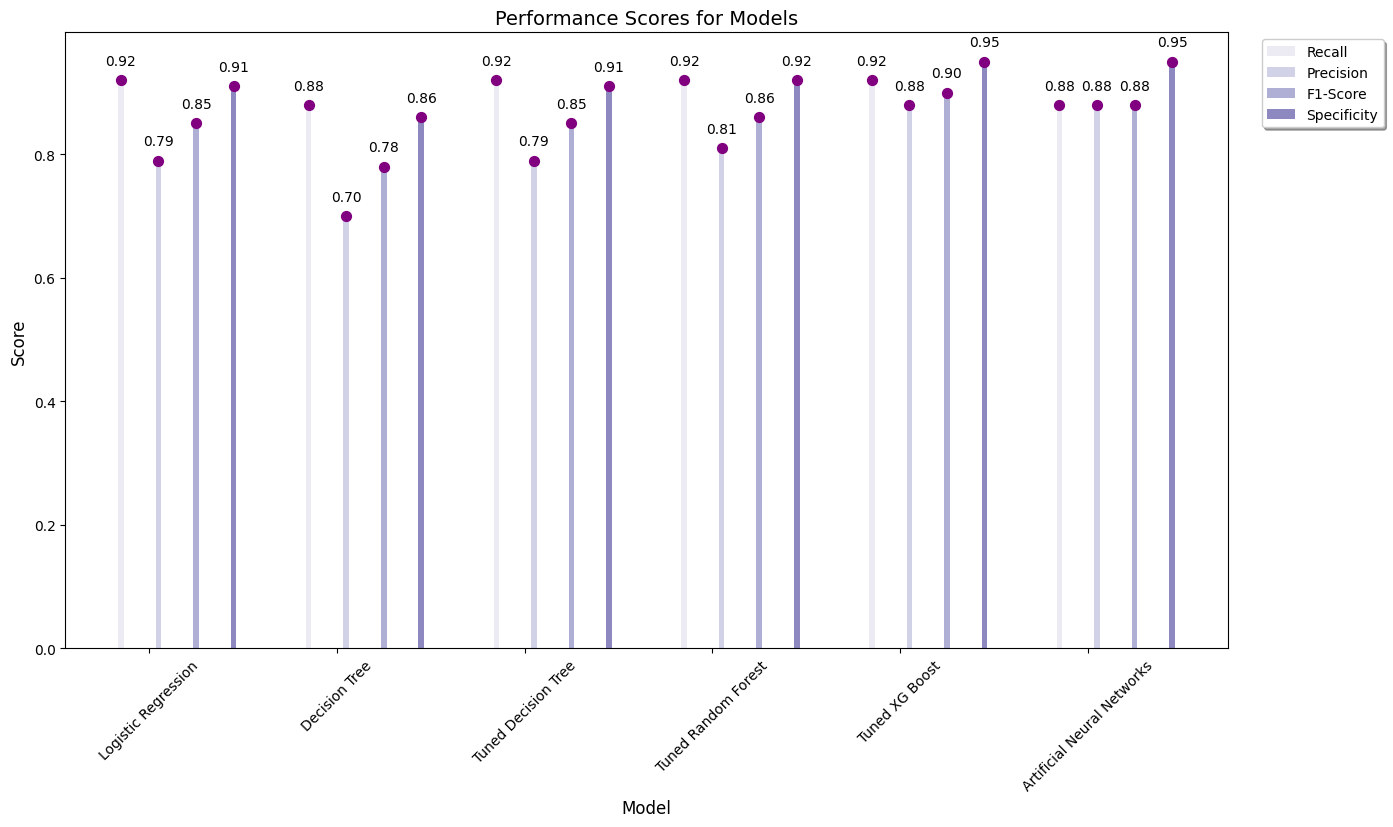

In [ ]:
# plot the figure with 15 x 8 size
fig, ax = plt.subplots(figsize=(15,8))

# Create the bar plot
bars1 = ax.bar(x=np.arange(len(per_scores['Model'])), height=per_scores['Recall'], width=0.03, label='Recall')
bars2 = ax.bar(x=np.arange(len(per_scores['Model']))+0.2, height=per_scores['Precision'], width=0.03, label='Precision')
bars3 = ax.bar(x=np.arange(len(per_scores['Model']))+0.4, height=per_scores['F1-Score'], width=0.03, label='F1-Score')
bars4 = ax.bar(x=np.arange(len(per_scores['Model']))+0.6, height=per_scores['Specificity'], width=0.03, label='Specificity')

# Add a circle at the top of every bar
for bar in bars1:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars3:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars4:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')

# set the title
plt.title('Performance Scores for Models', fontsize = 14)

# X axis label
plt.xlabel('Model', fontsize = 12)

# Y axis label
plt.ylabel('Score', fontsize = 12)

# rotate x axis labels for better visualisation on the axis
plt.xticks(np.arange(len(per_scores['Model'])) + 0.15, per_scores['Model'], rotation=45)

ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1),
          ncol=1, fancybox=True, shadow=True)

plt.show()


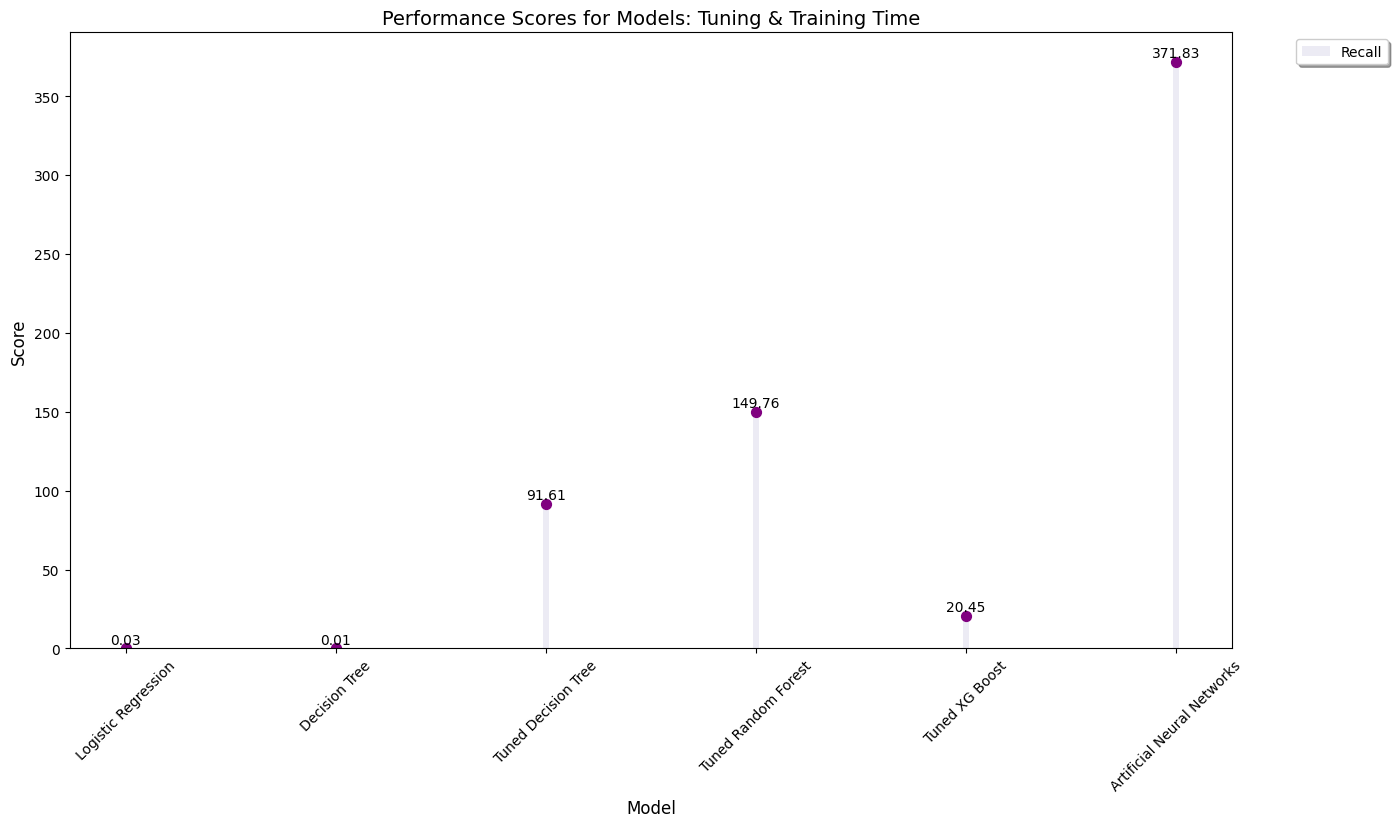

In [ ]:
# plot the figure with 15 x 8 size
fig, ax = plt.subplots(figsize=(15,8))

# Create the bar plot
bars = ax.bar(x=np.arange(len(per_scores['Model'])), height=per_scores['Tuning & Training Time'], width=0.03, label='Recall')

# Add a circle at the top of every bar
for bar in bars:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +1, f'{bar.get_height():.2f}', ha='center', va='bottom')


# set the title
plt.title('Performance Scores for Models: Tuning & Training Time', fontsize = 14)

# X axis label
plt.xlabel('Model', fontsize = 12)

# Y axis label
plt.ylabel('Score', fontsize = 12)

# rotate x axis labels for better visualisation on the axis
plt.xticks(np.arange(len(per_scores['Model'])), per_scores['Model'], rotation=45)

ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1),
          ncol=1, fancybox=True, shadow=True)

plt.show()

In [ ]:
per_scores['Tuning & Training Time'] = round(per_scores['Tuning & Training Time'], 2)

In [ ]:
per_scores = per_scores.drop(columns = 'Sensitivity')

In [ ]:
per_scores

Model  Recall  Precision  F1-Score  Specificity  \
0         Logistic Regression    0.92       0.79      0.85         0.91   
1               Decision Tree    0.88       0.70      0.78         0.86   
2         Tuned Decision Tree    0.92       0.79      0.85         0.91   
3         Tuned Random Forest    0.92       0.81      0.86         0.92   
4              Tuned XG Boost    0.92       0.88      0.90         0.95   
5  Artificial Neural Networks    0.88       0.88      0.88         0.95   

   Tuning & Training Time  
0                    0.03  
1                    0.01  
2                   91.61  
3                  149.76  
4                   20.45  
5                  371.83

In [ ]:
per_scores[['Model', 'Tuning & Training Time']].T

0              1  \
Model                   Logistic Regression  Decision Tree   
Tuning & Training Time                 0.03           0.01   

                                          2                    3  \
Model                   Tuned Decision Tree  Tuned Random Forest   
Tuning & Training Time                91.61               149.76   

                                     4                           5  
Model                   Tuned XG Boost  Artificial Neural Networks  
Tuning & Training Time           20.45                      371.83

In [ ]:
per_scores.to_csv (r'/content/drive/MyDrive/Assignment 1/per_scores.csv', index = False, header=True)

In [ ]:
total_time = round(time.time() - initial_time, 2)
print(f'Total time to run program: {total_time} seconds')

Total time to run program: 1054.23 seconds
